<ipython-input-2-d86fb0c3f1cb>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


LC-Menge nachher:  1697


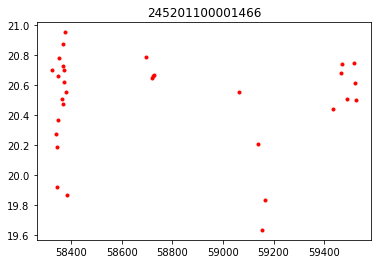

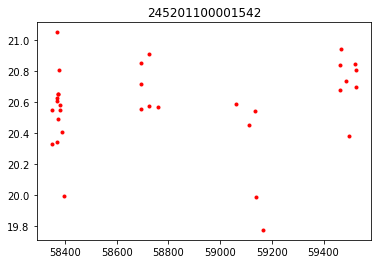

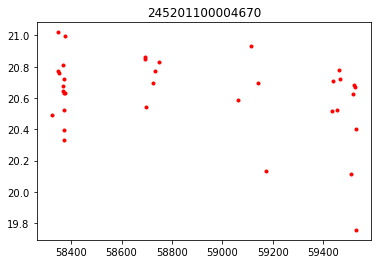

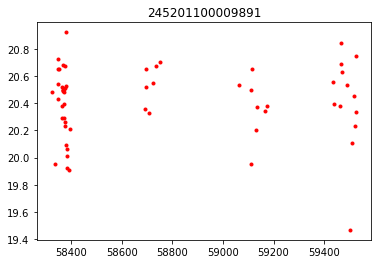

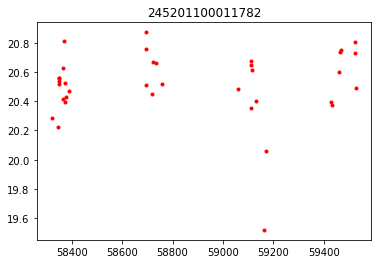

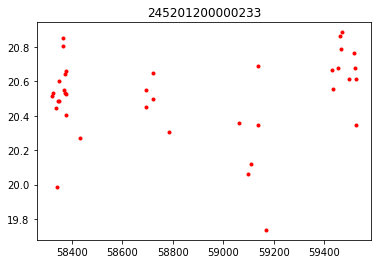

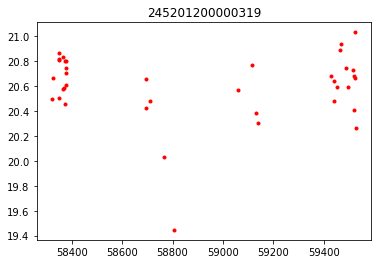

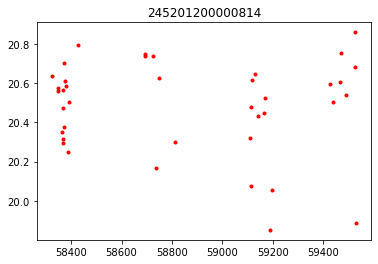

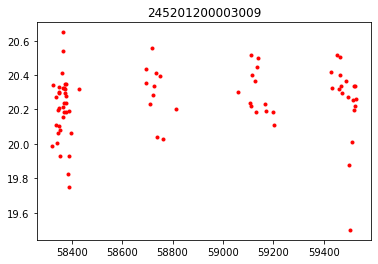

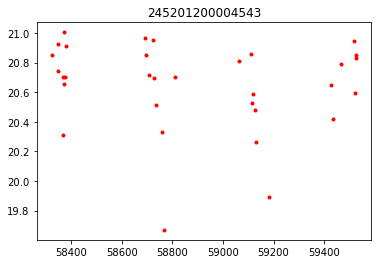

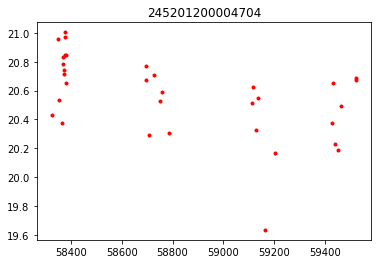

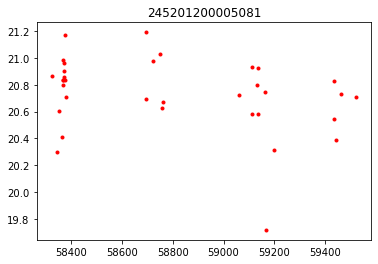

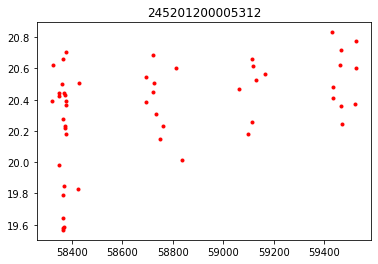

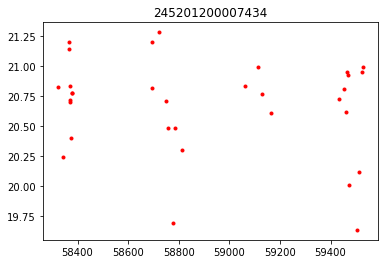

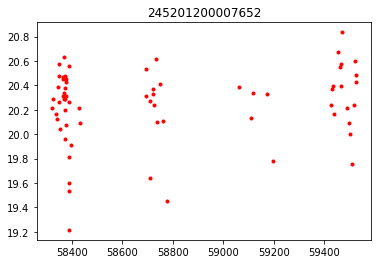

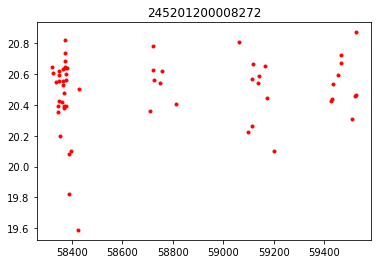

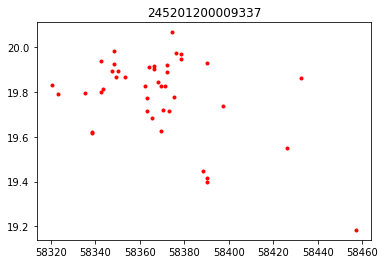

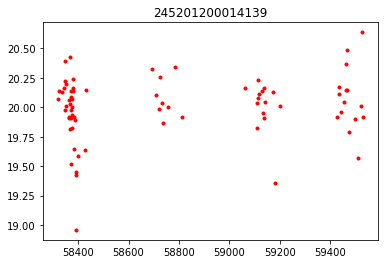

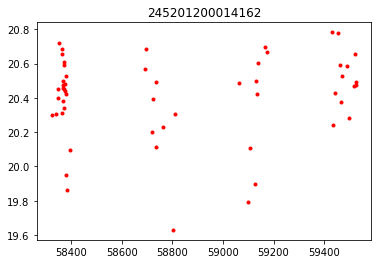

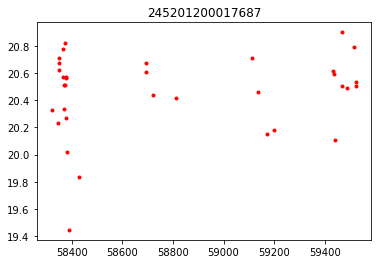

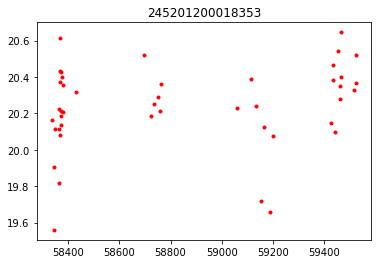

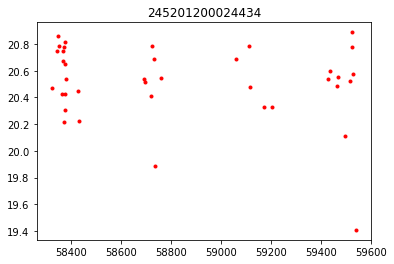

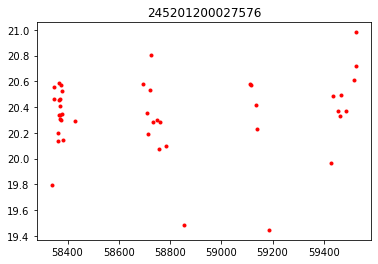

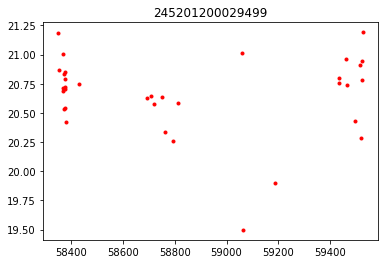

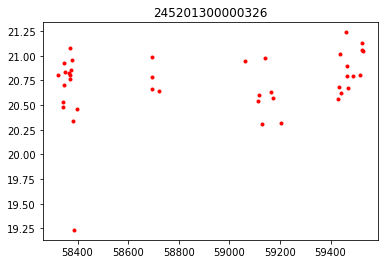

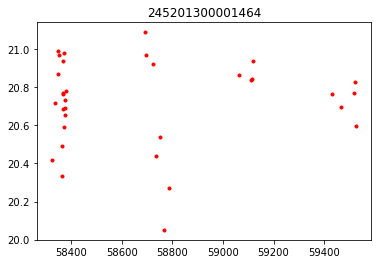

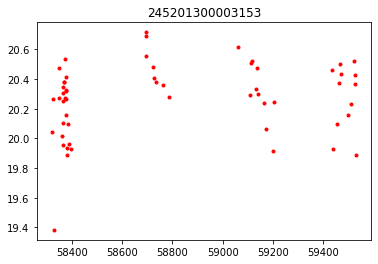

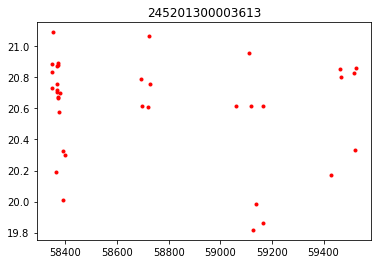

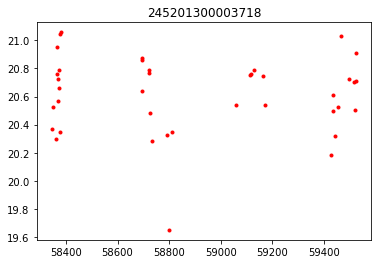

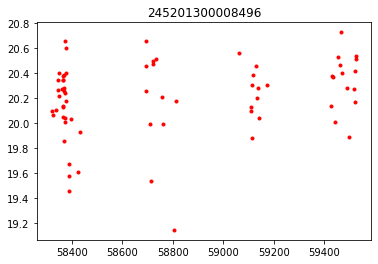

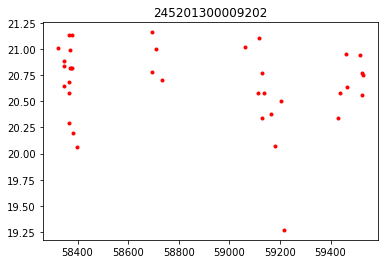

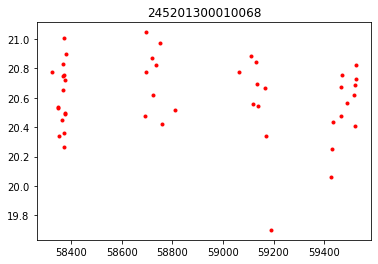

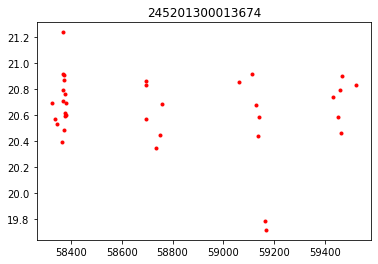

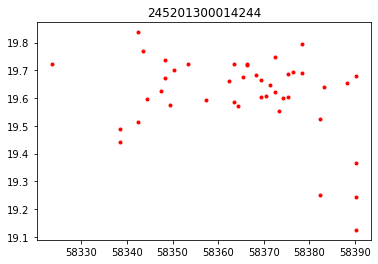

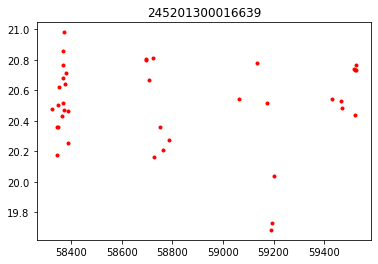

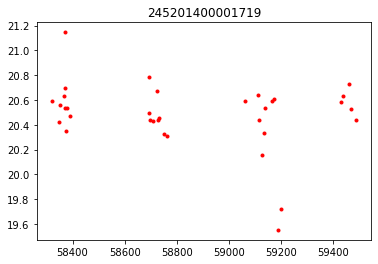

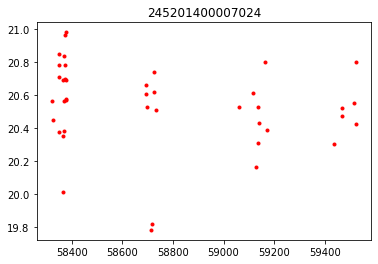

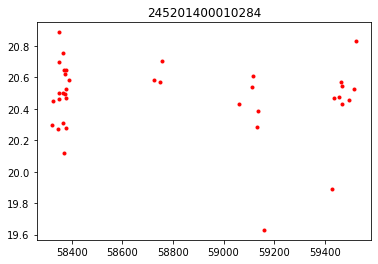

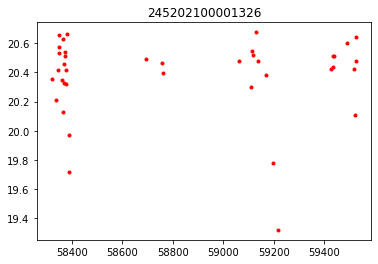

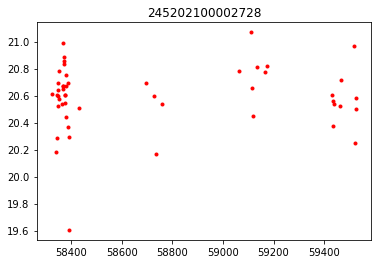

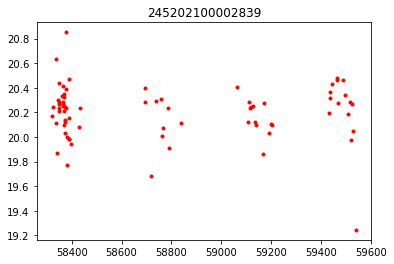

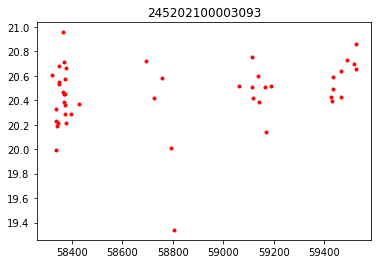

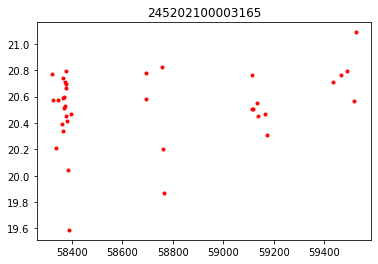

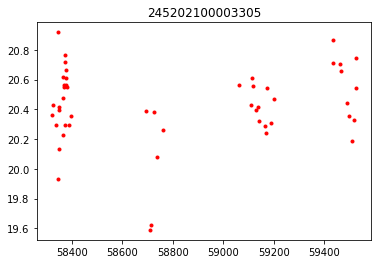

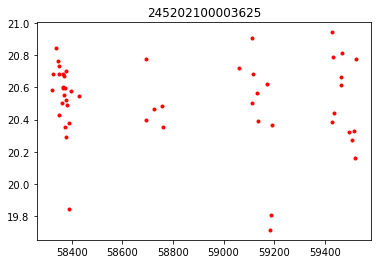

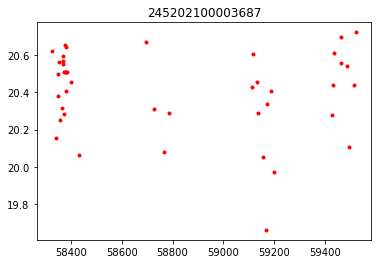

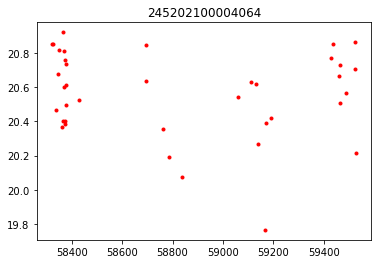

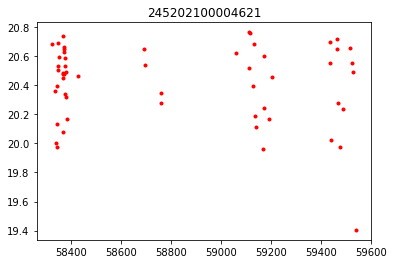

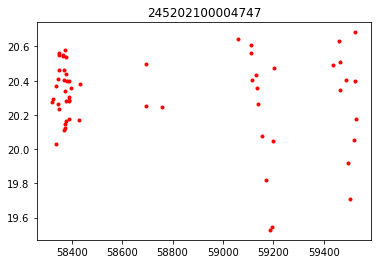

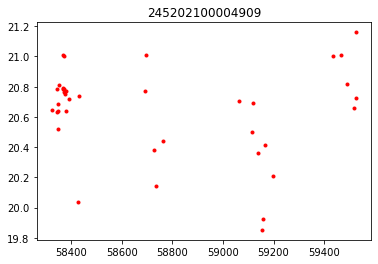

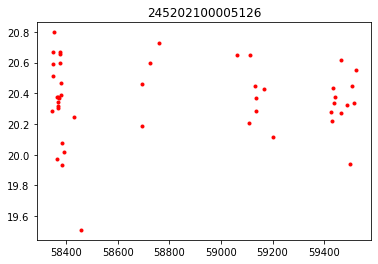

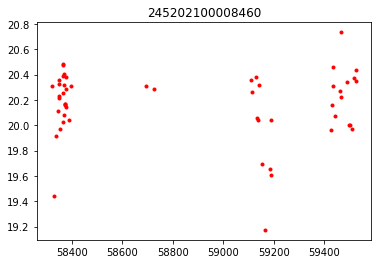

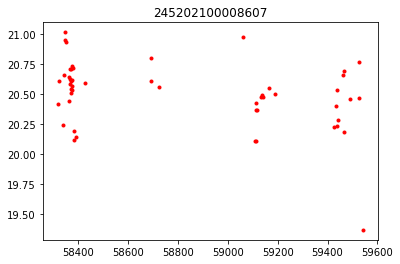

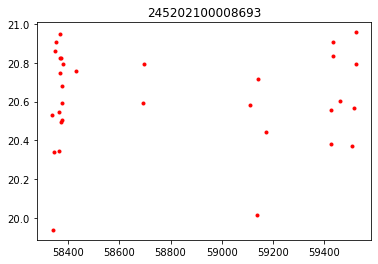

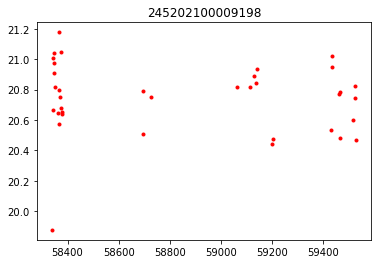

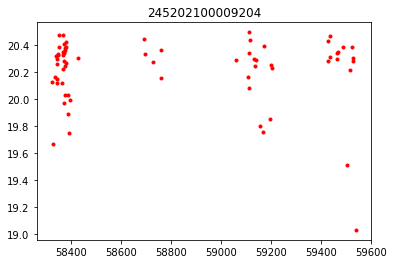

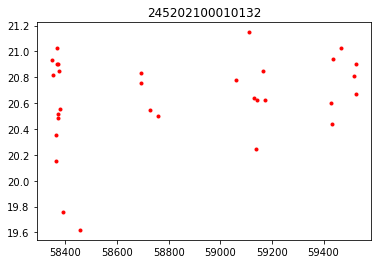

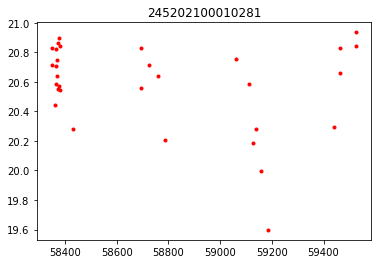

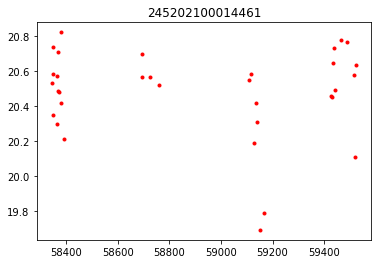

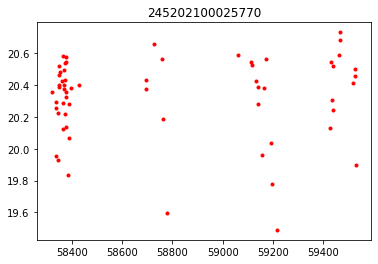

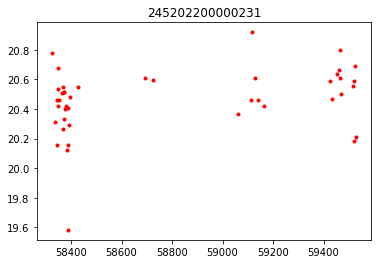

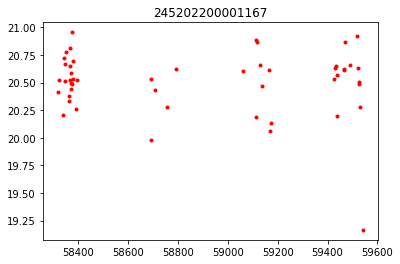

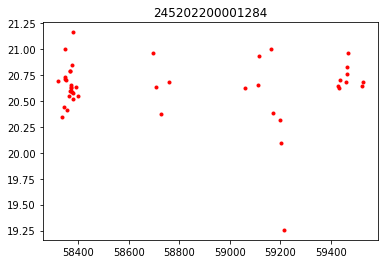

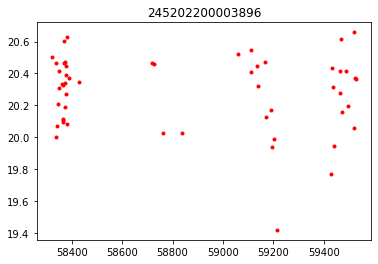

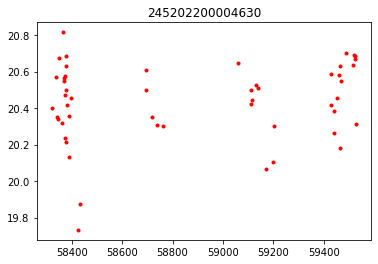

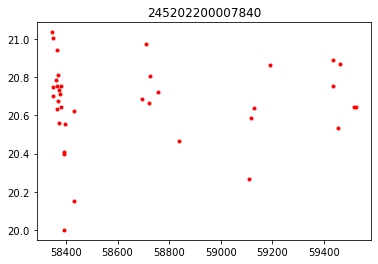

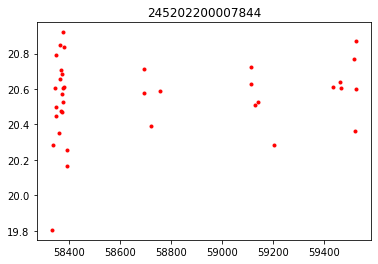

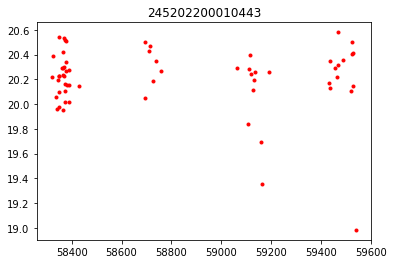

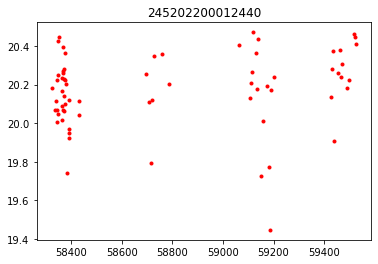

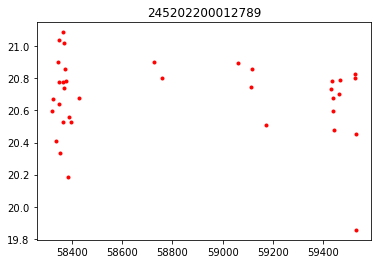

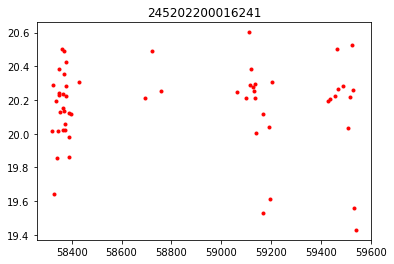

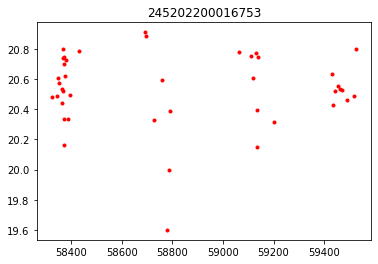

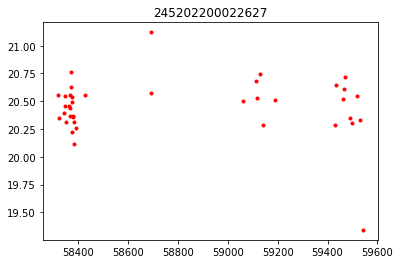

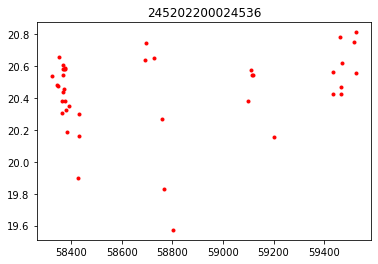

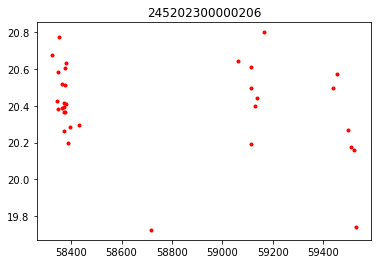

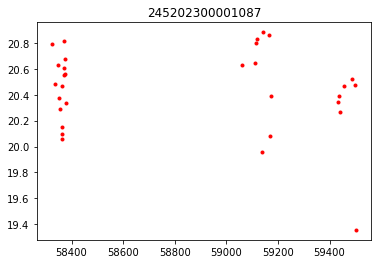

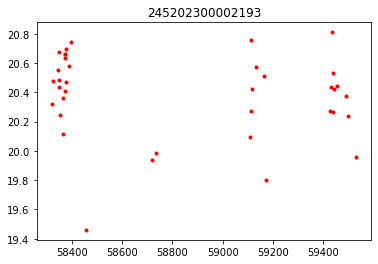

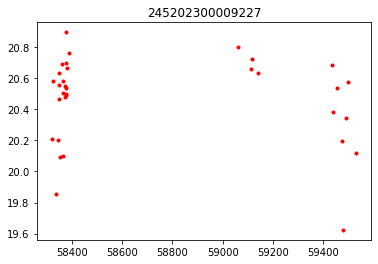

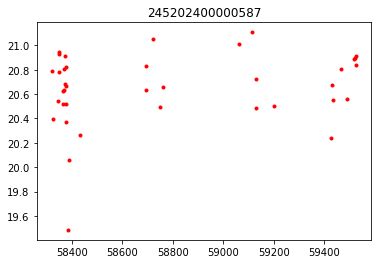

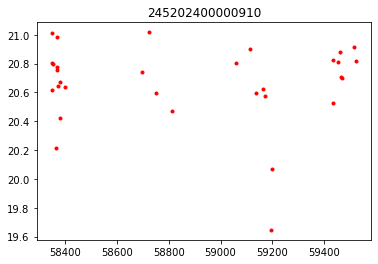

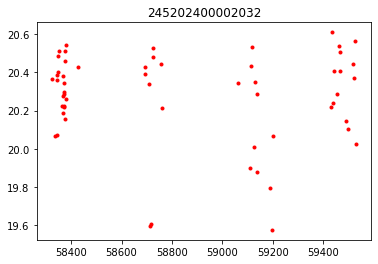

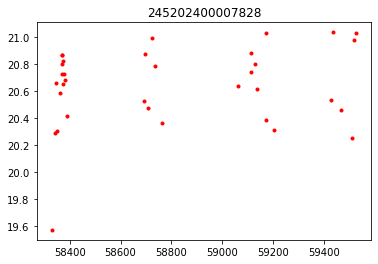

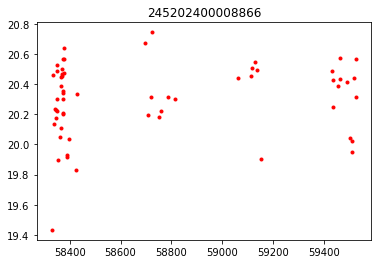

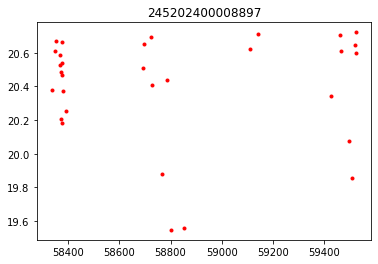

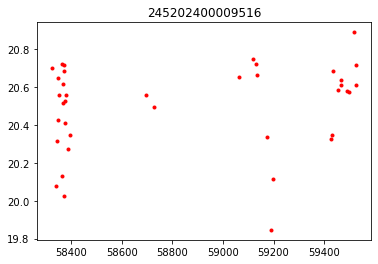

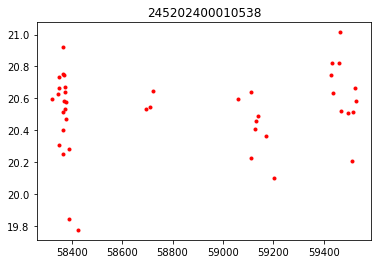

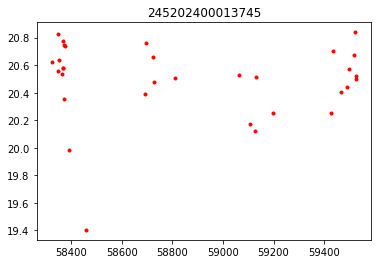

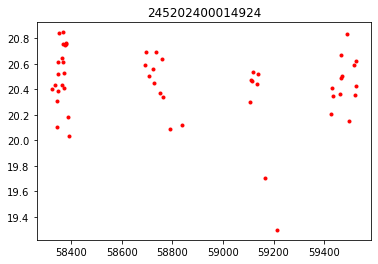

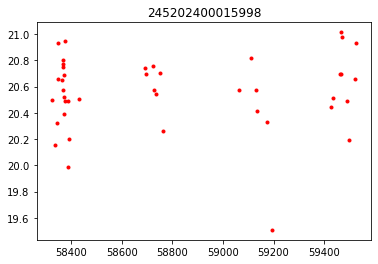

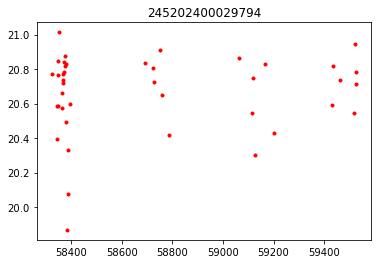

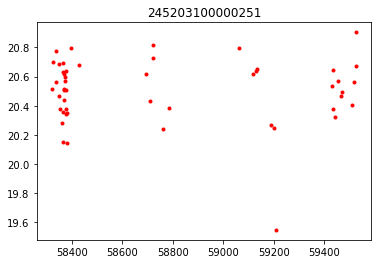

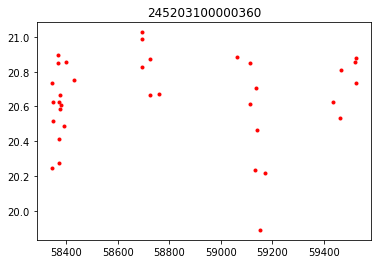

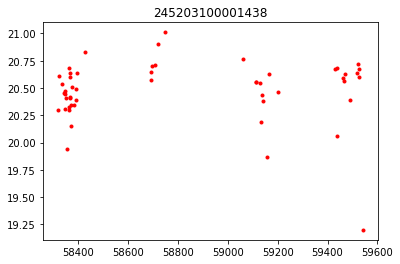

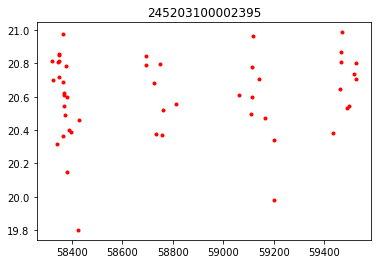

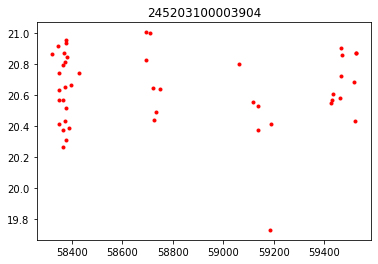

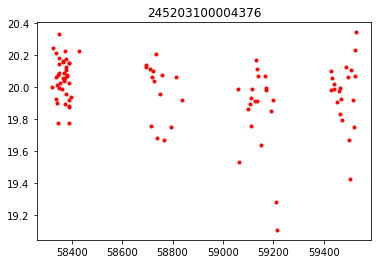

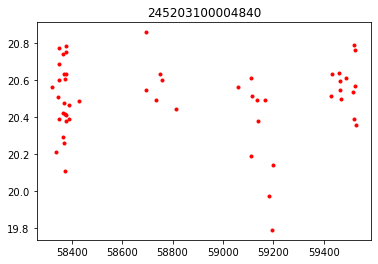

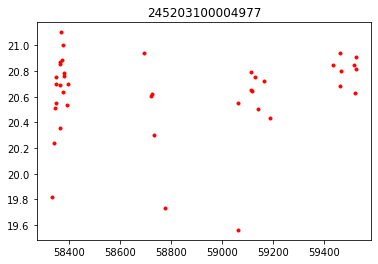

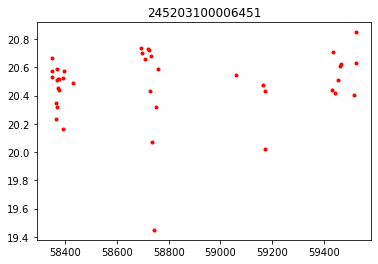

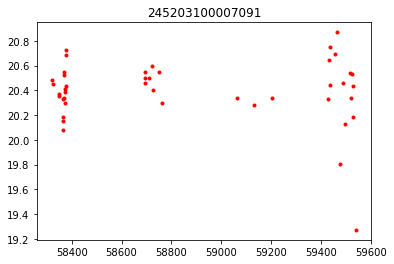

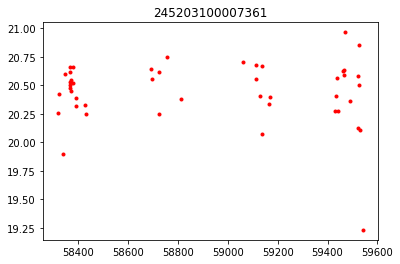

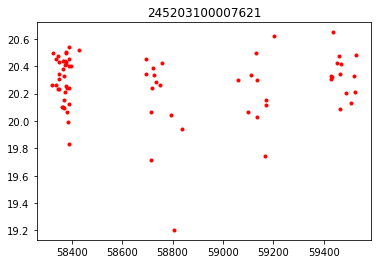

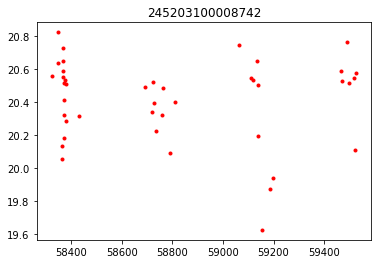

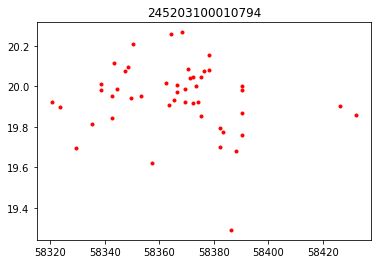

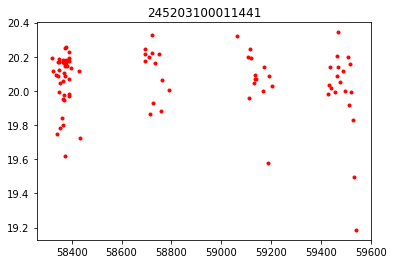

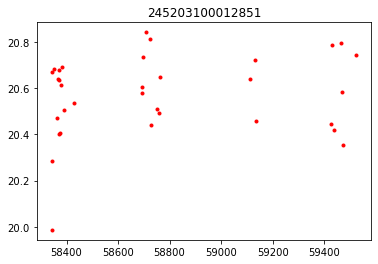

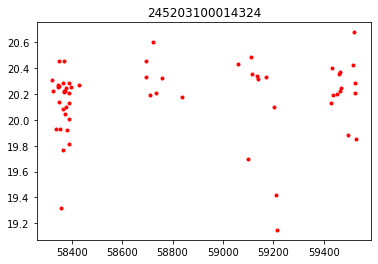

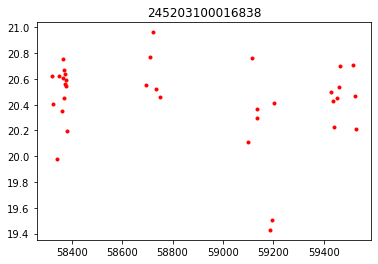

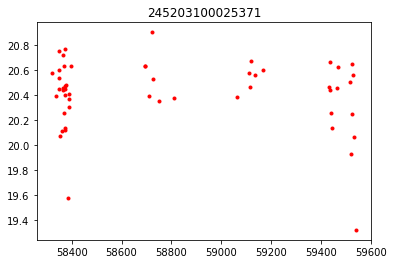

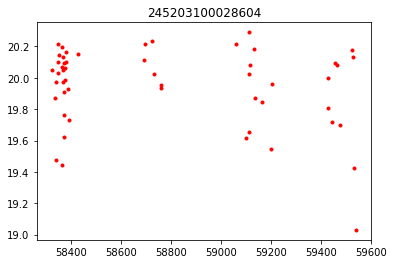

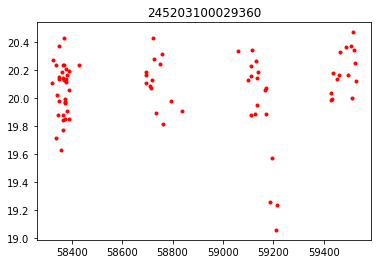

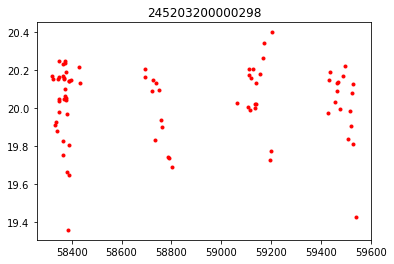

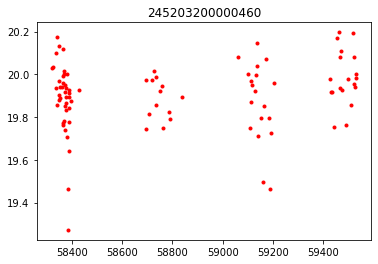

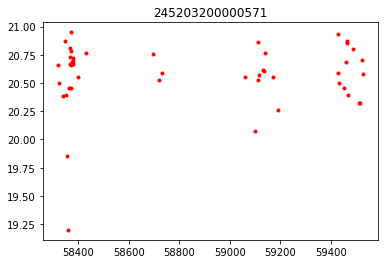

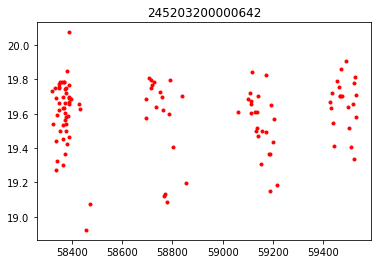

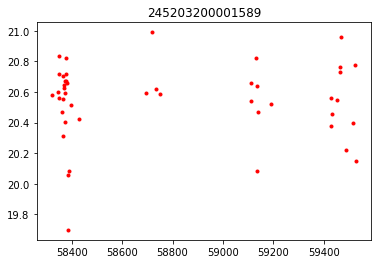

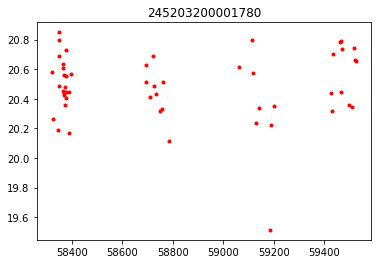

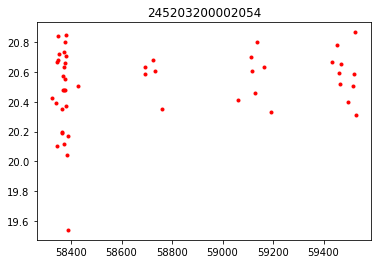

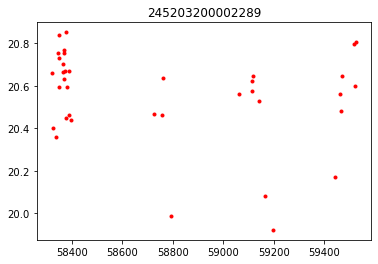

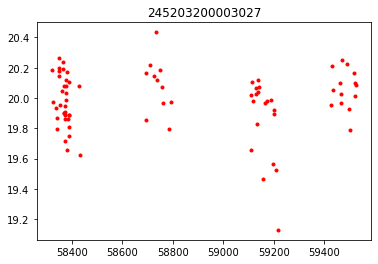

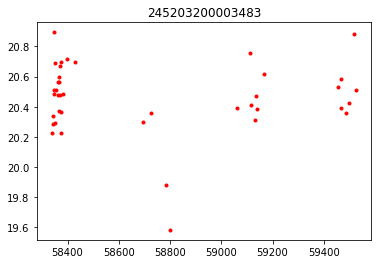

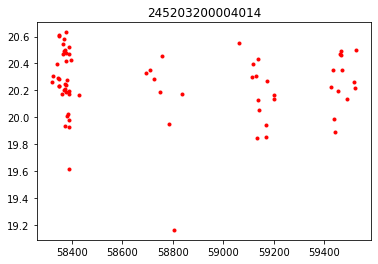

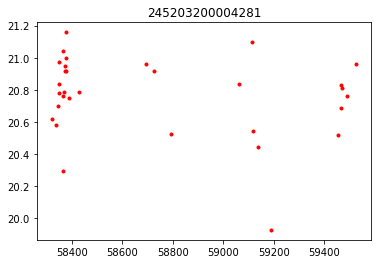

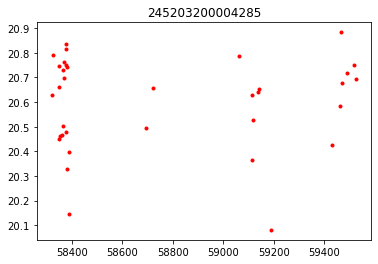

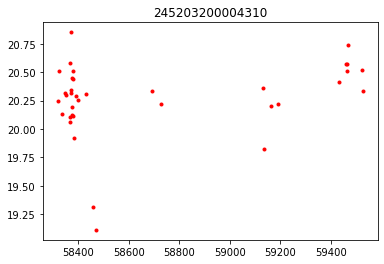

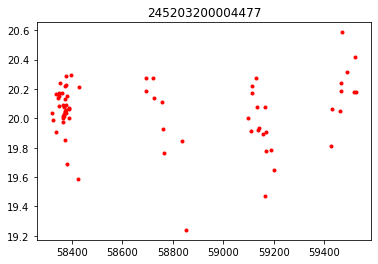

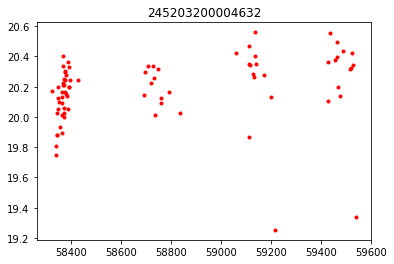

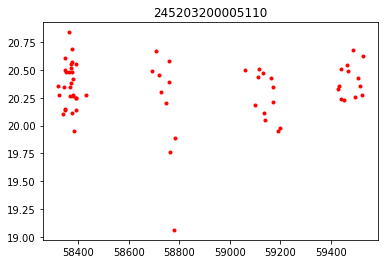

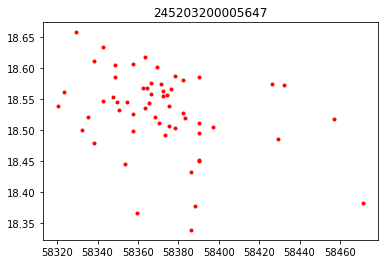

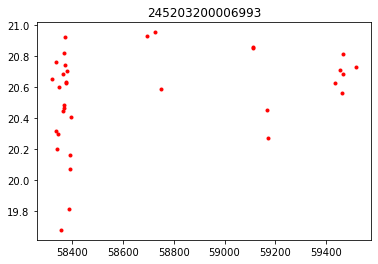

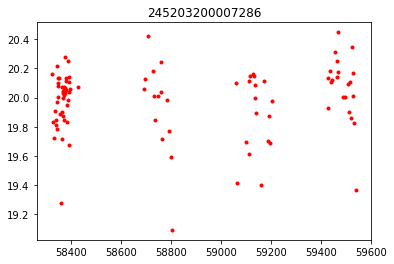

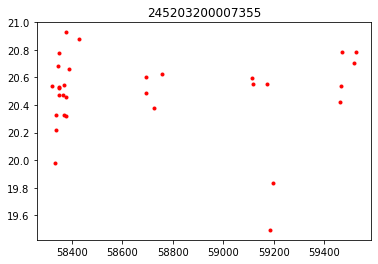

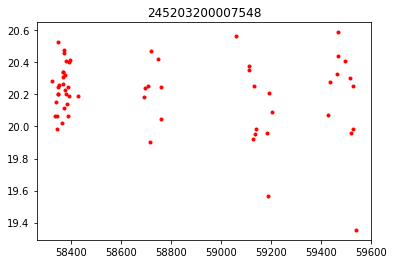

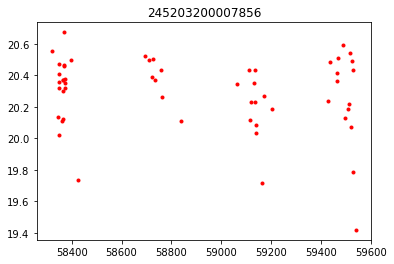

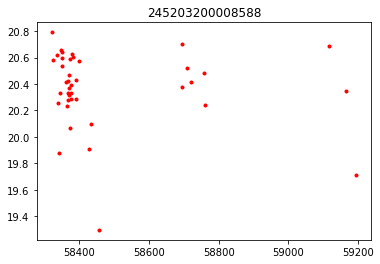

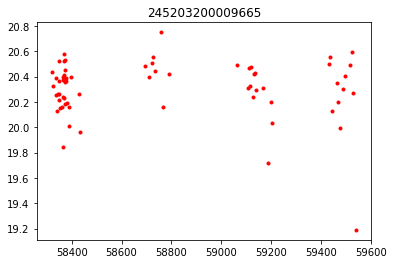

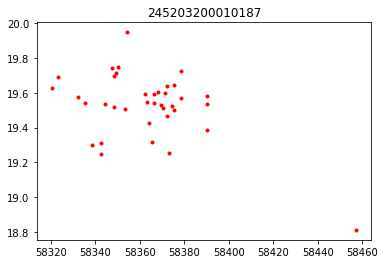

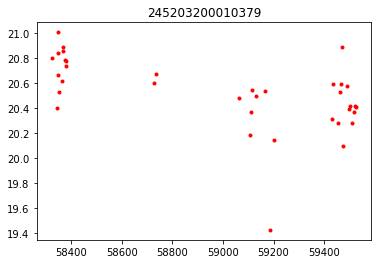

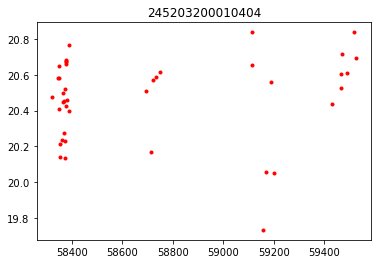

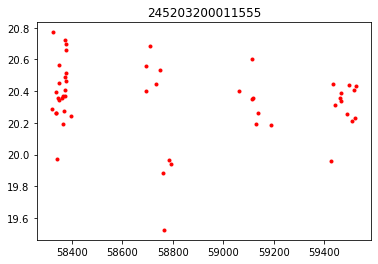

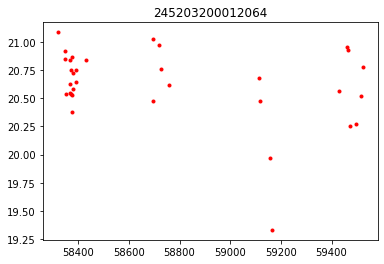

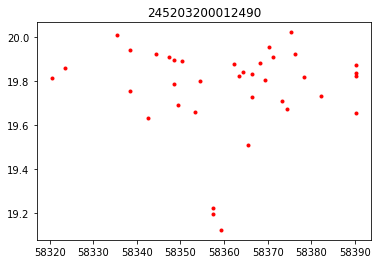

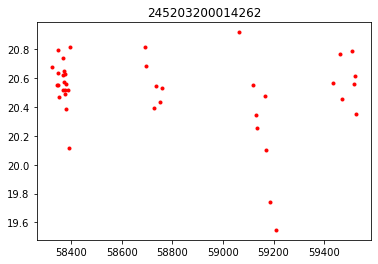

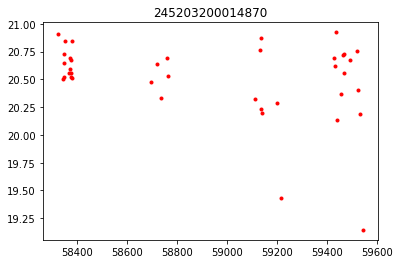

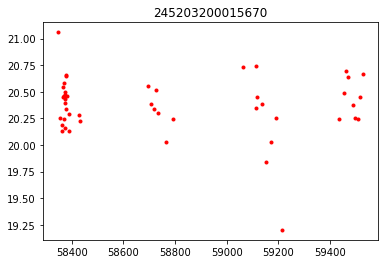

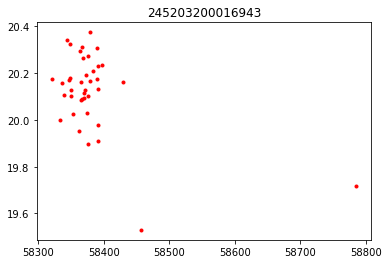

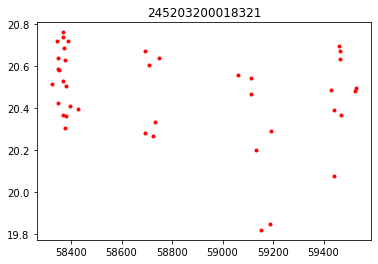

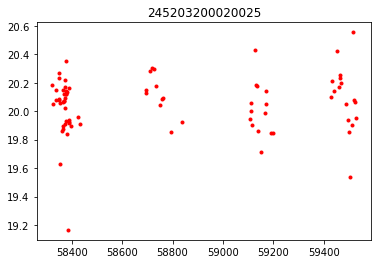

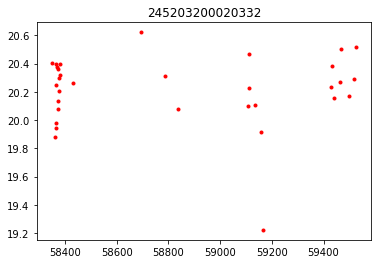

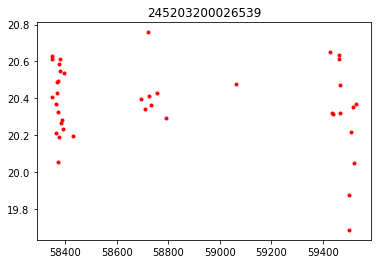

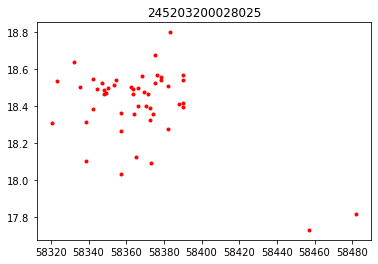

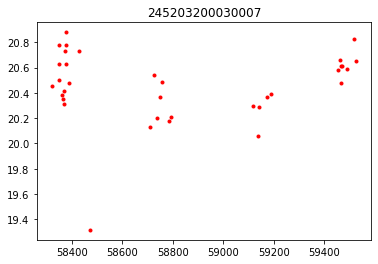

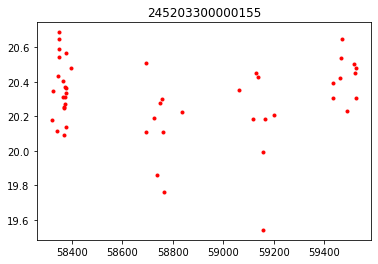

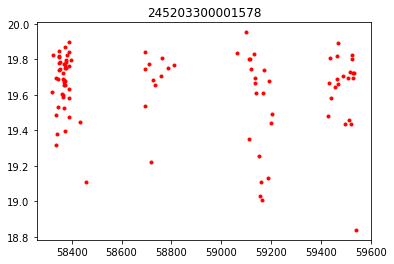

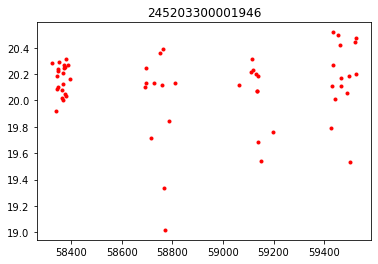

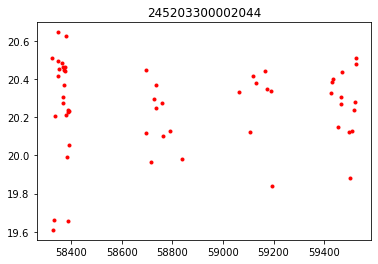

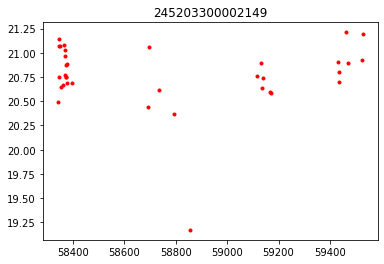

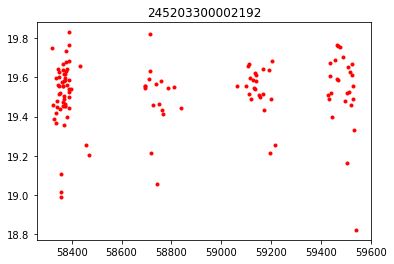

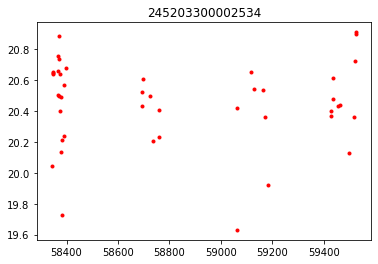

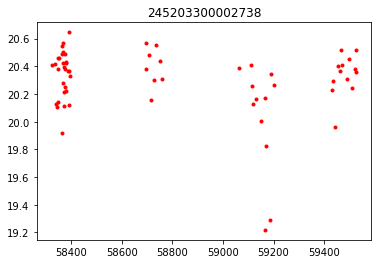

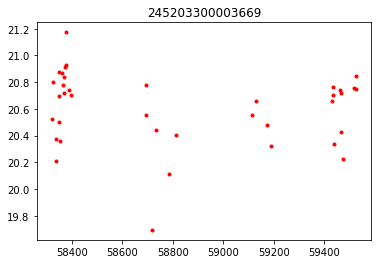

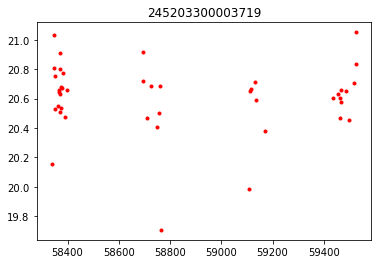

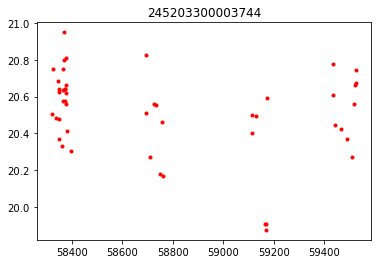

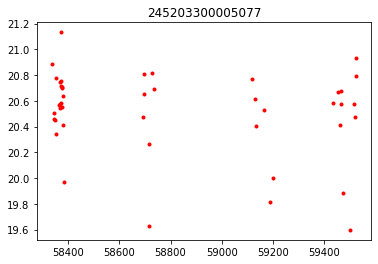

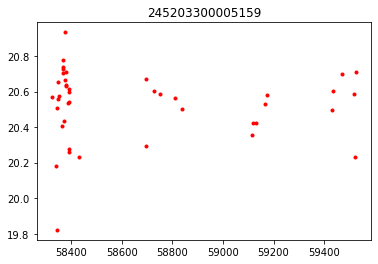

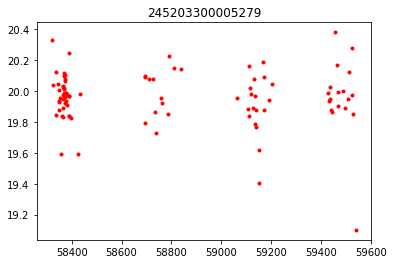

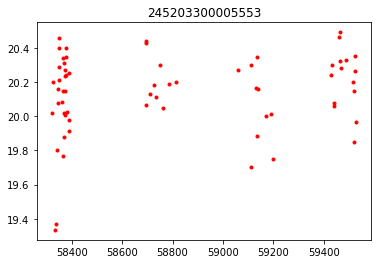

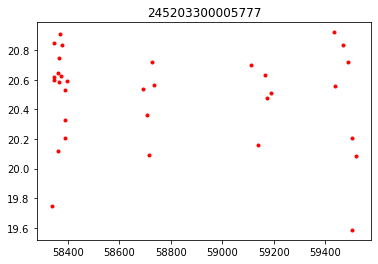

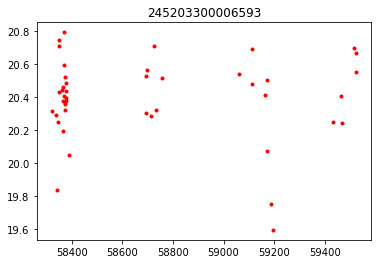

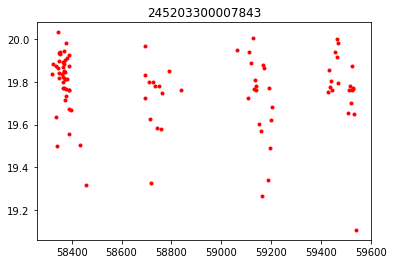

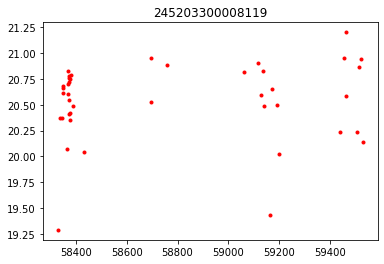

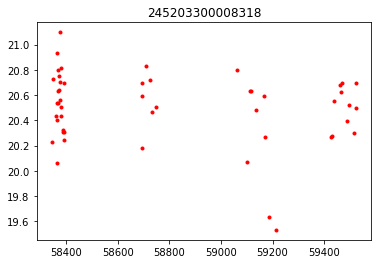

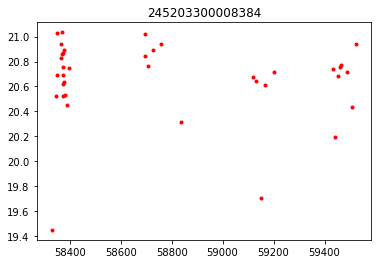

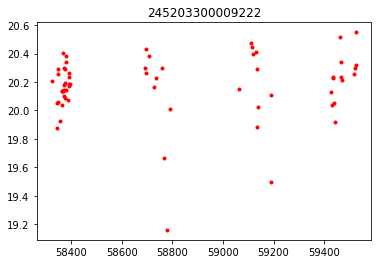

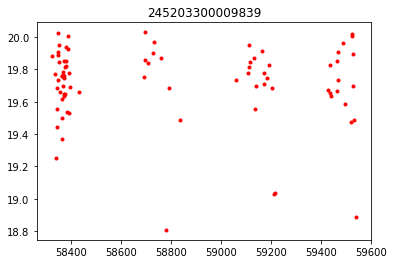

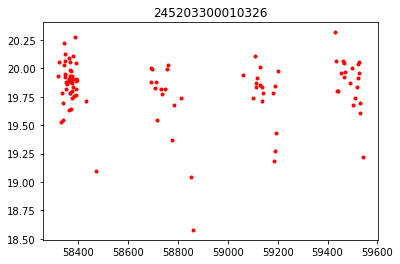

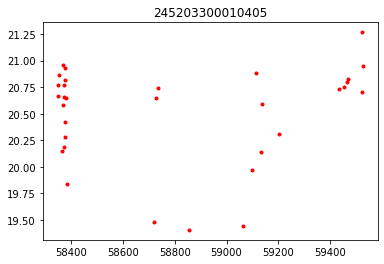

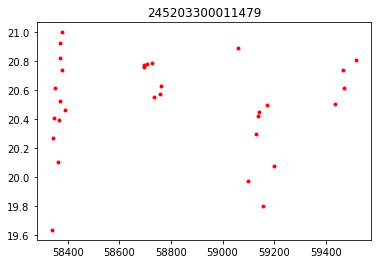

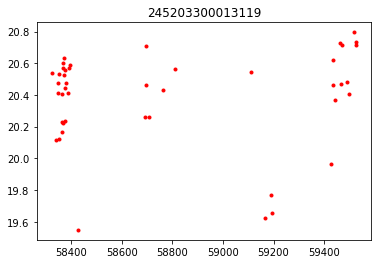

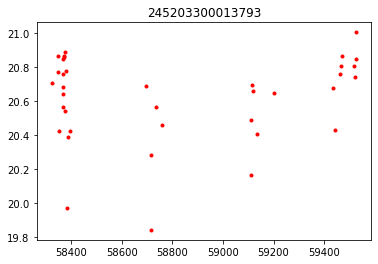

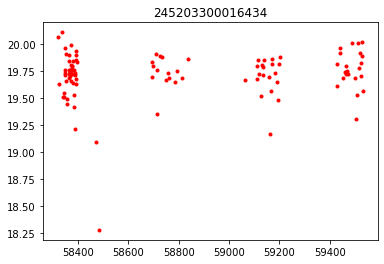

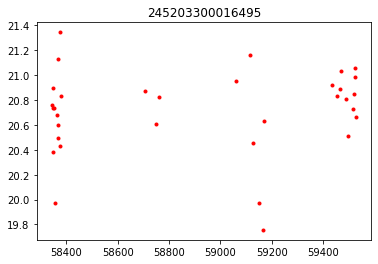

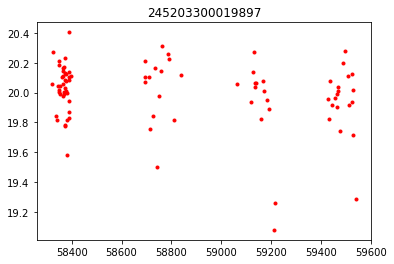

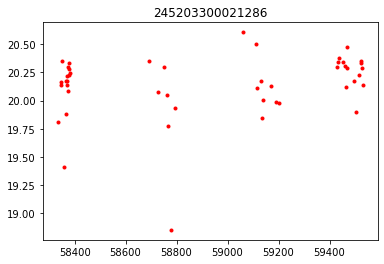

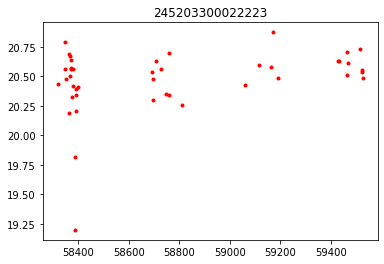

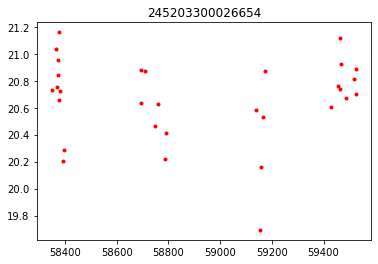

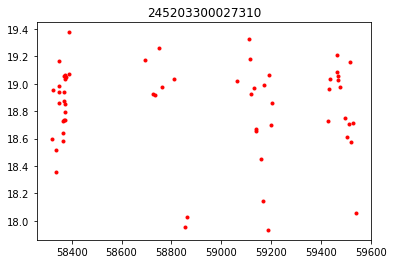

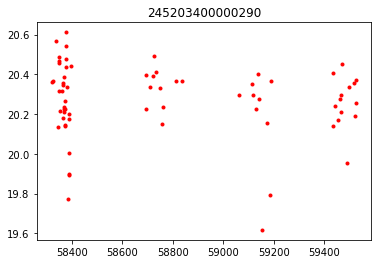

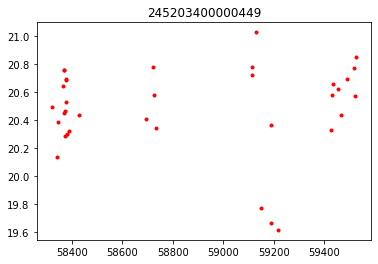

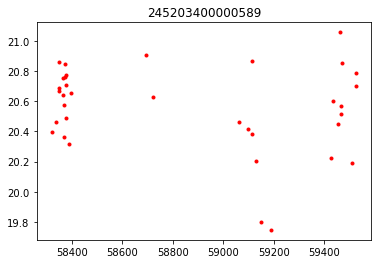

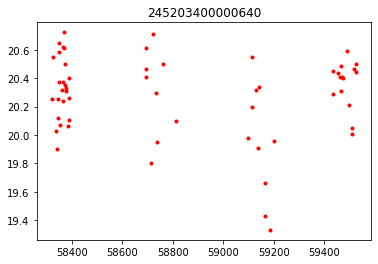

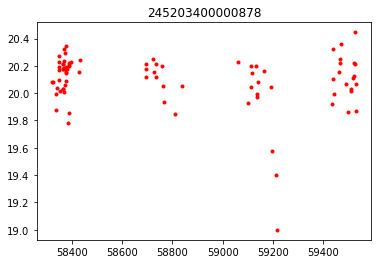

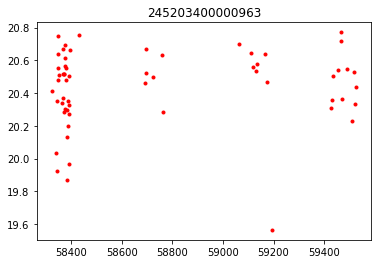

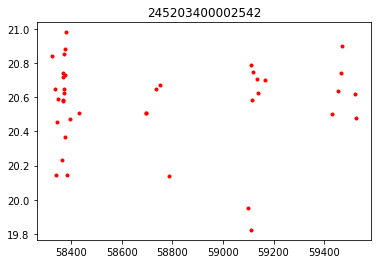

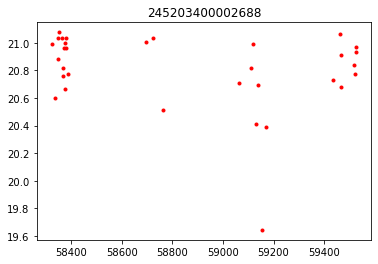

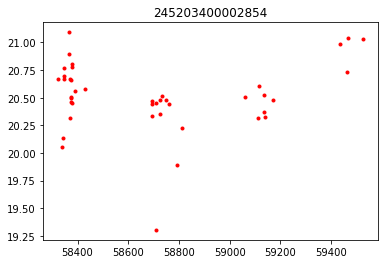

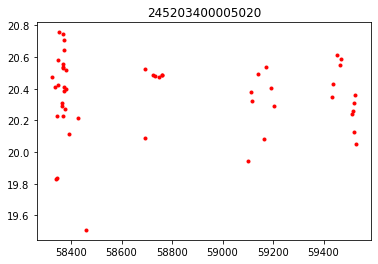

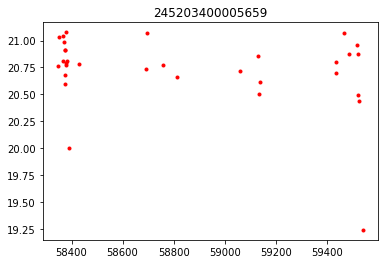

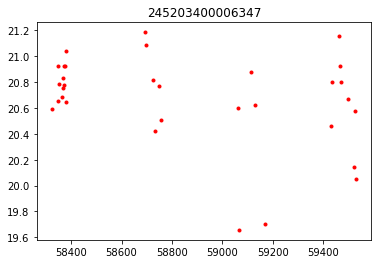

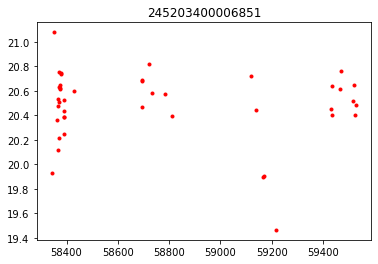

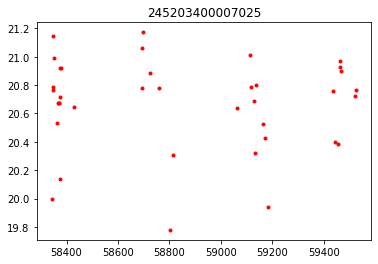

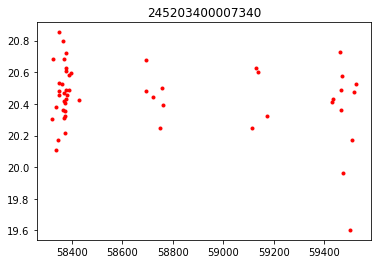

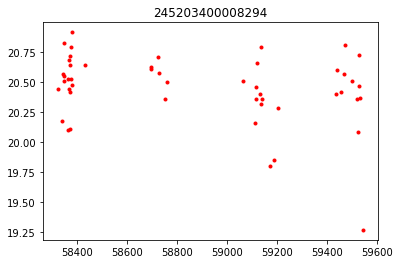

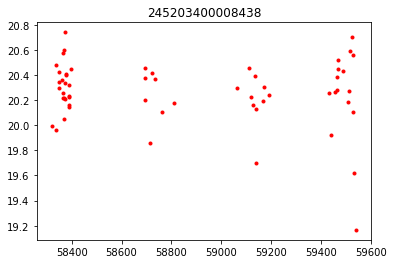

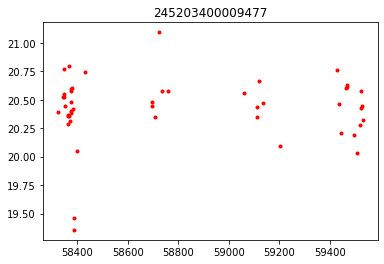

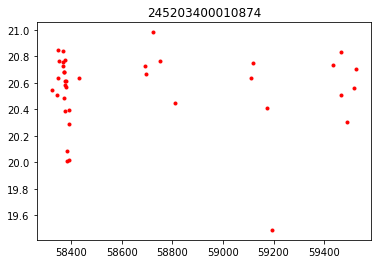

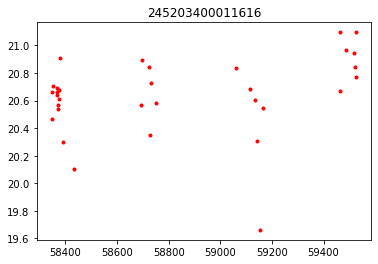

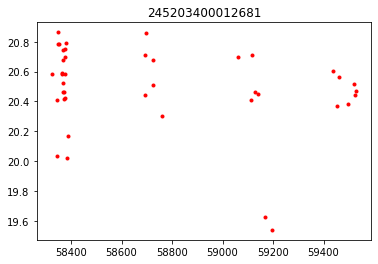

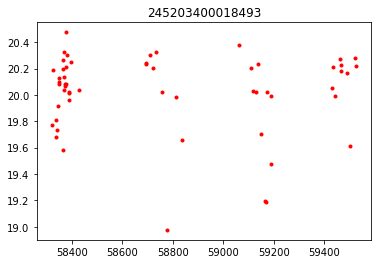

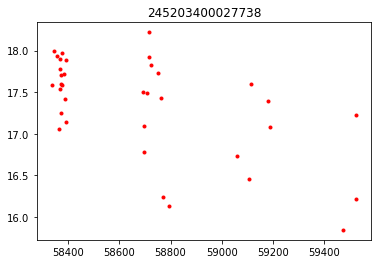

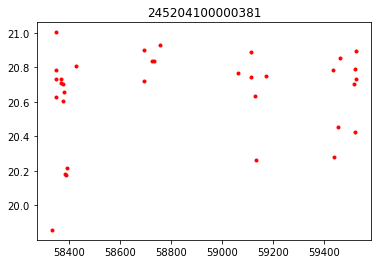

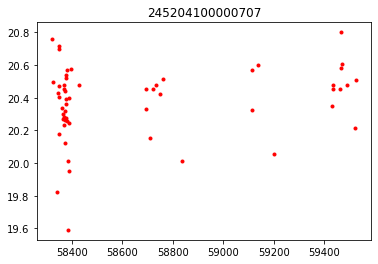

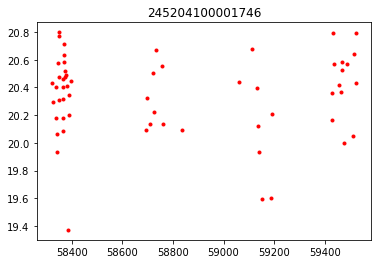

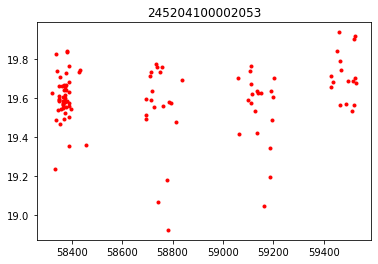

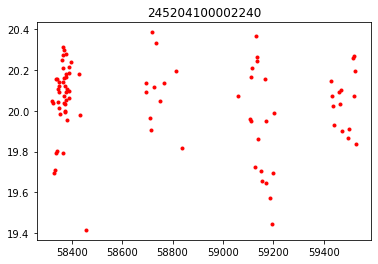

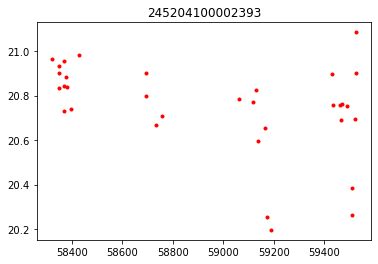

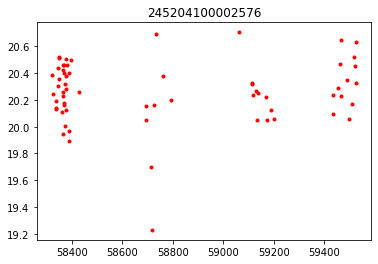

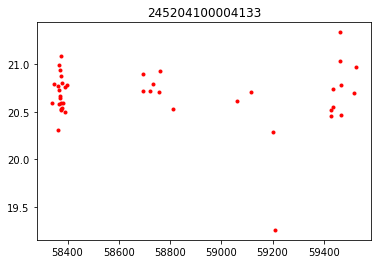

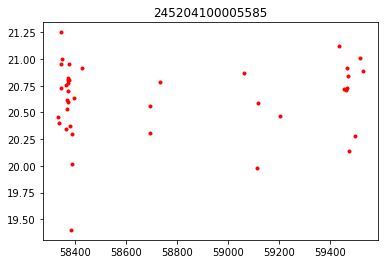

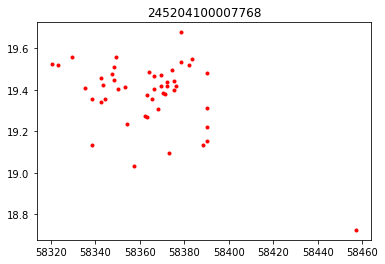

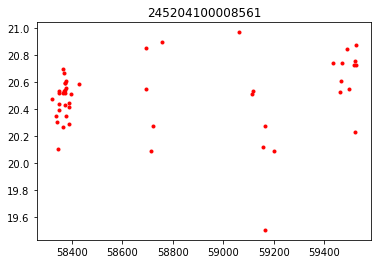

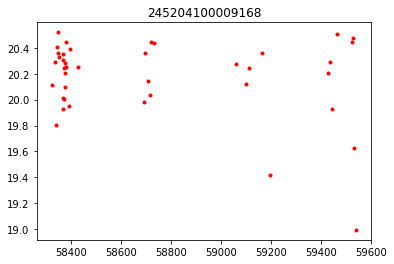

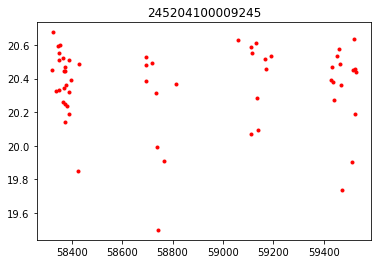

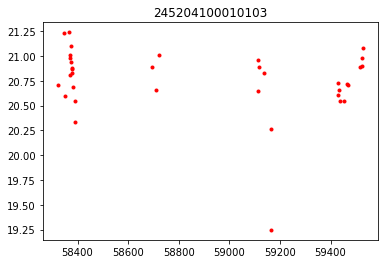

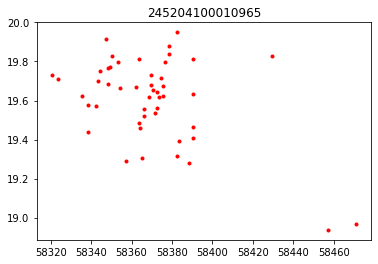

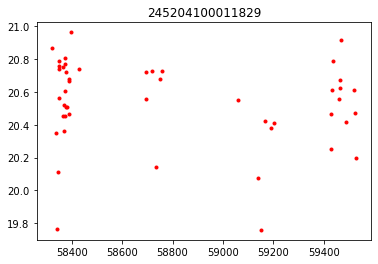

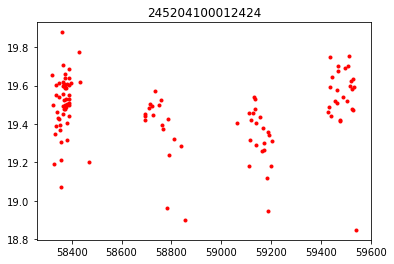

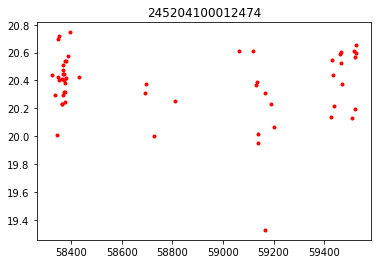

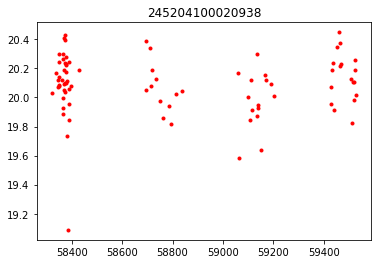

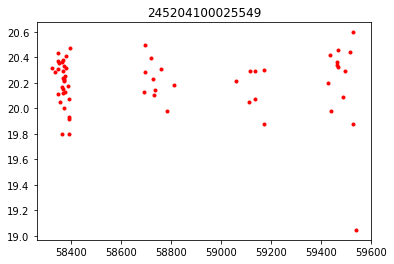

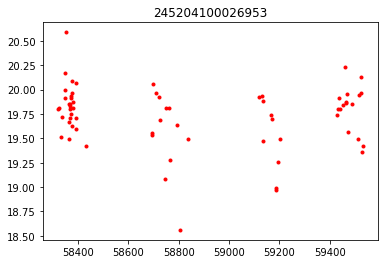

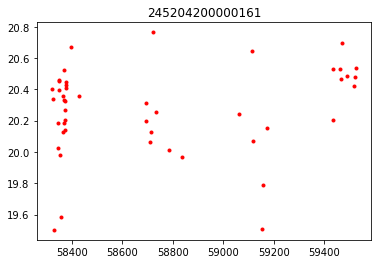

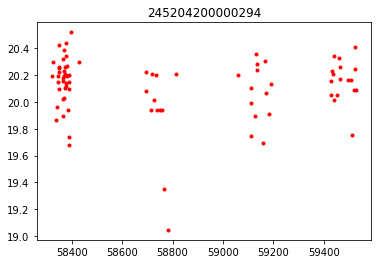

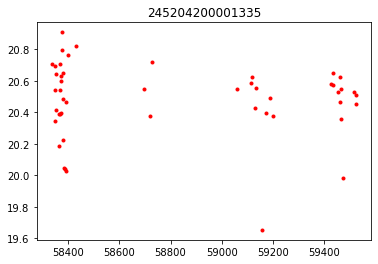

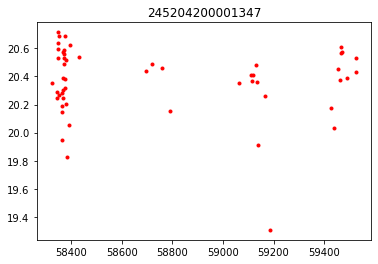

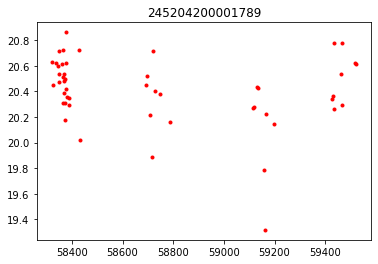

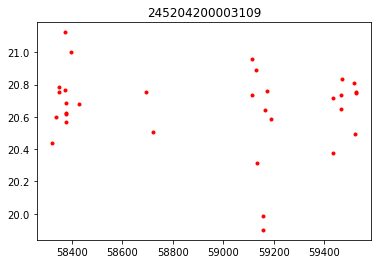

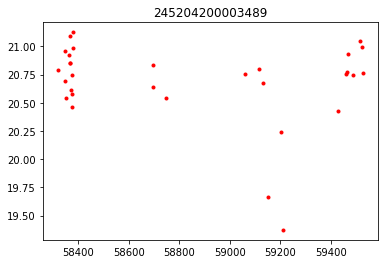

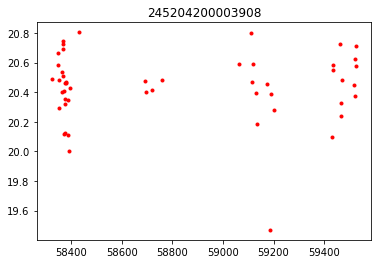

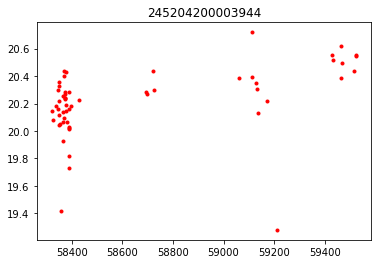

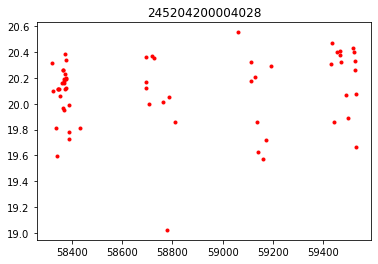

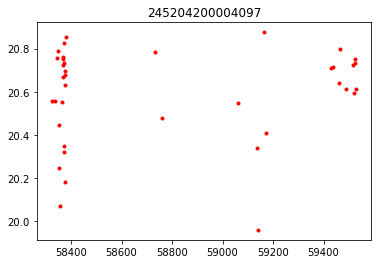

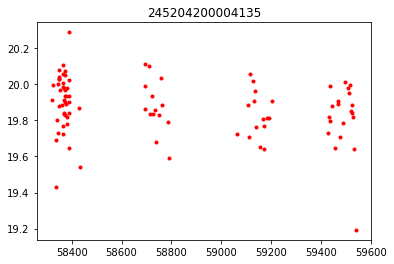

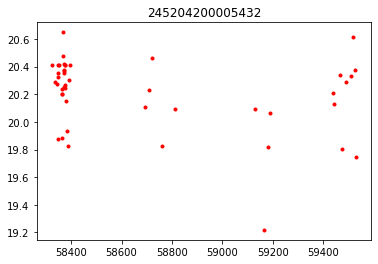

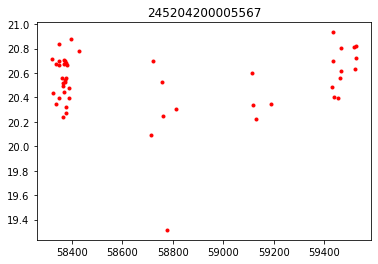

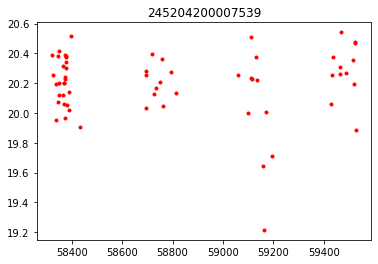

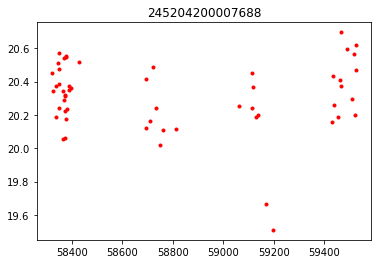

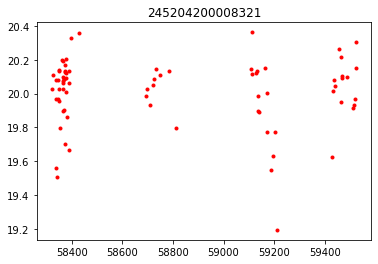

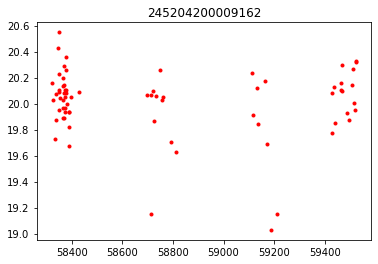

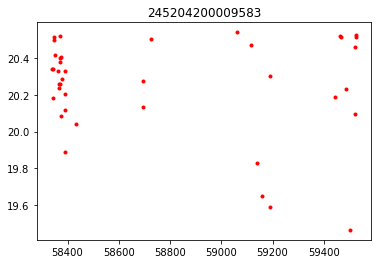

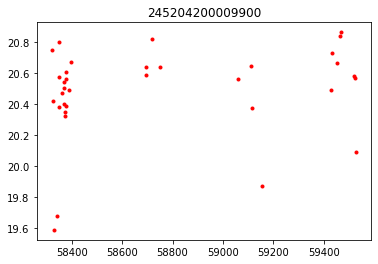

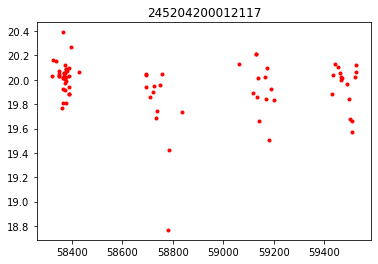

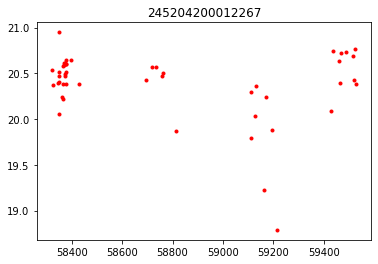

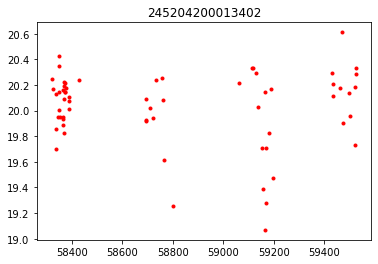

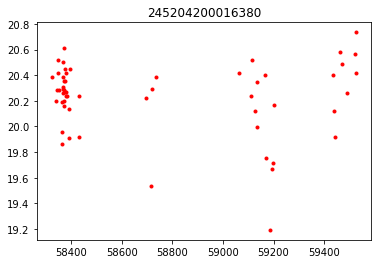

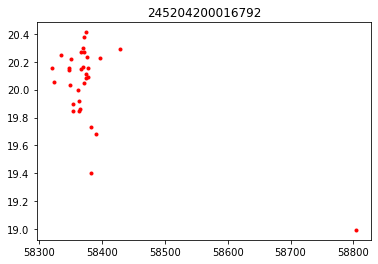

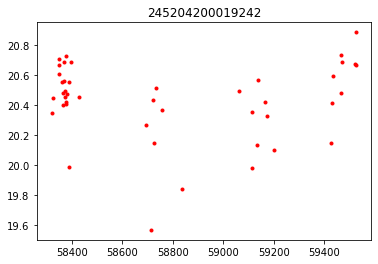

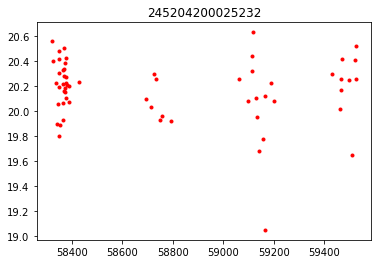

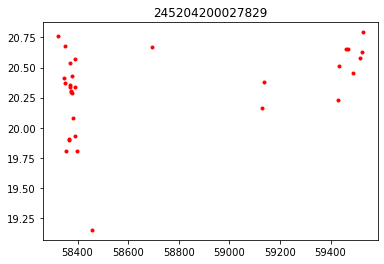

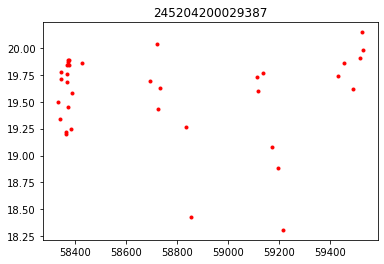

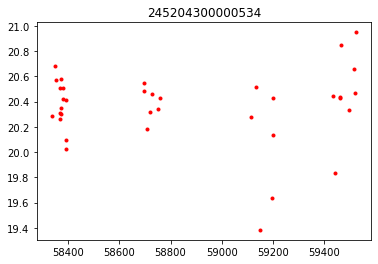

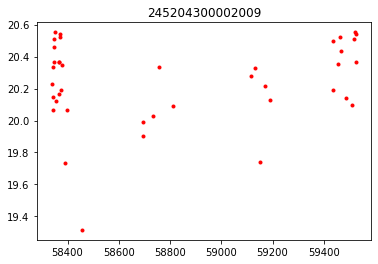

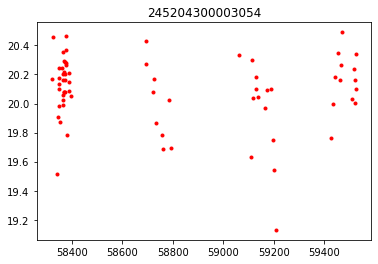

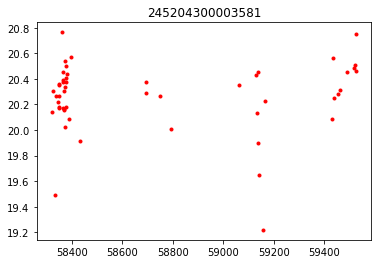

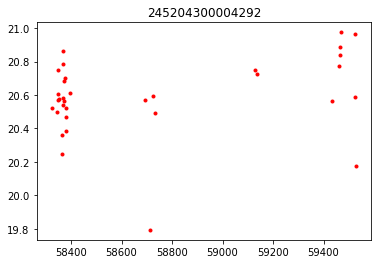

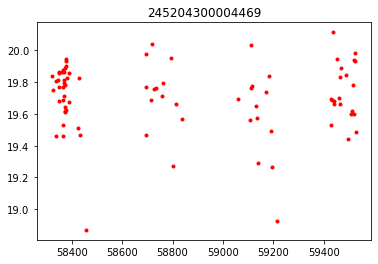

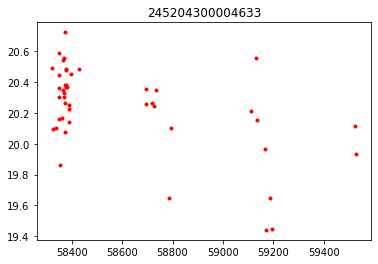

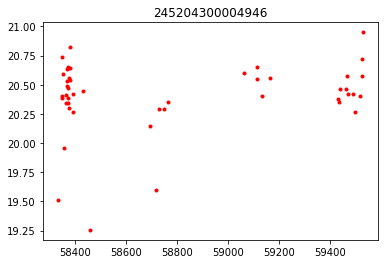

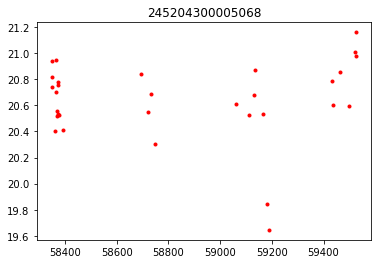

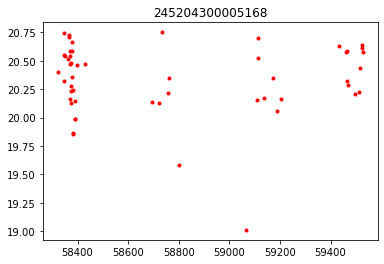

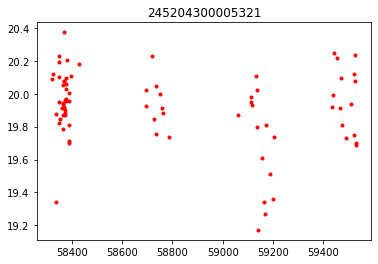

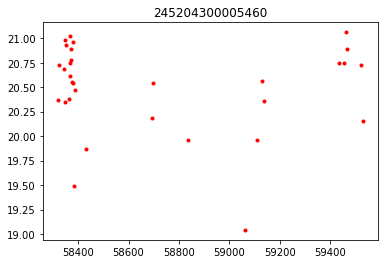

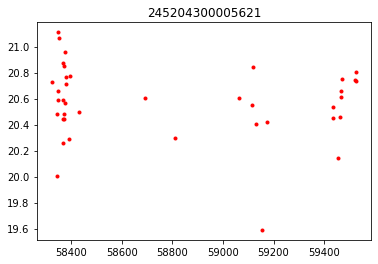

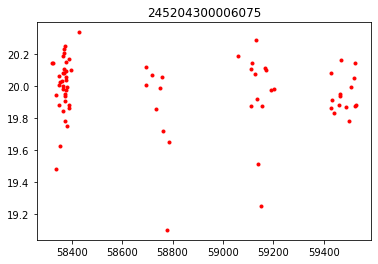

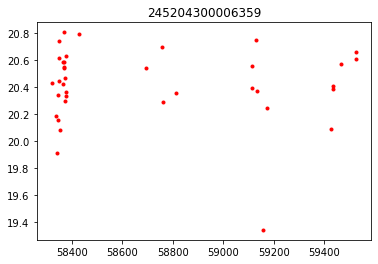

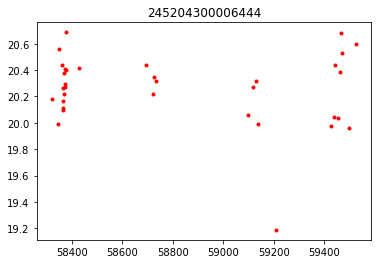

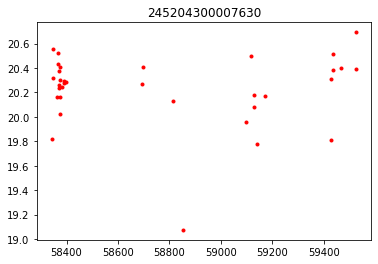

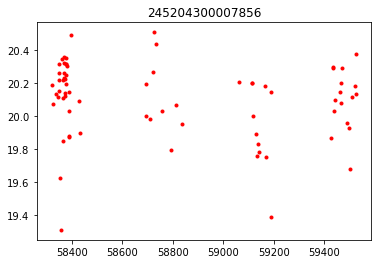

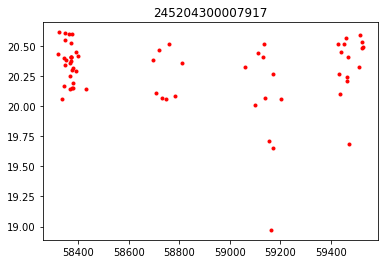

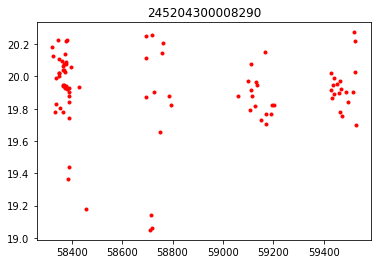

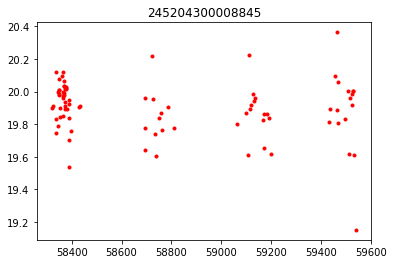

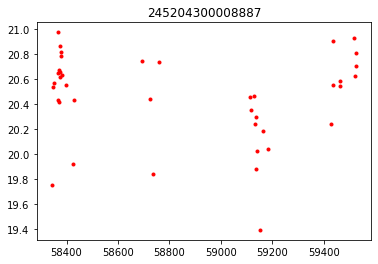

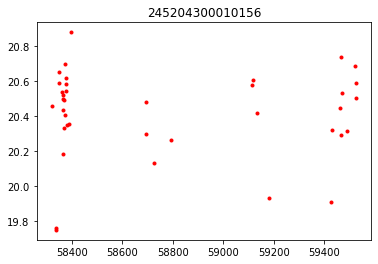

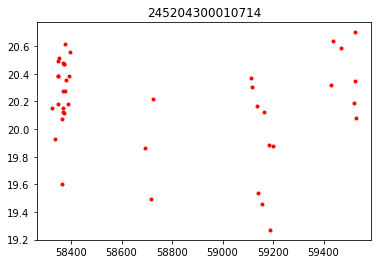

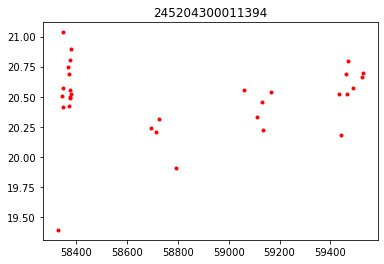

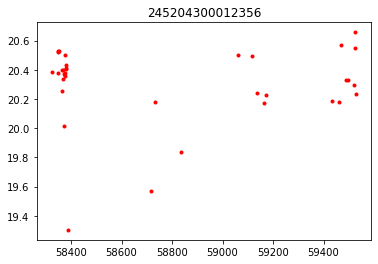

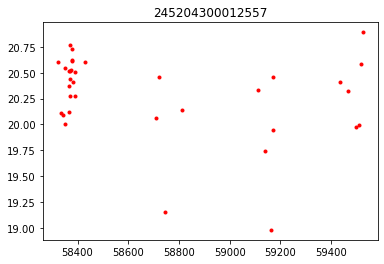

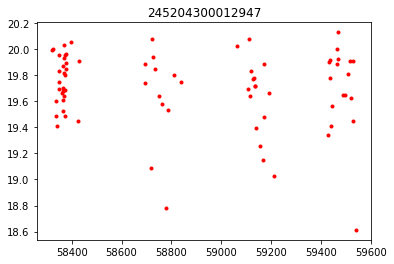

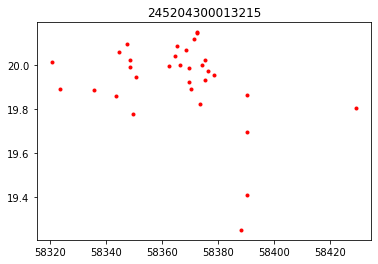

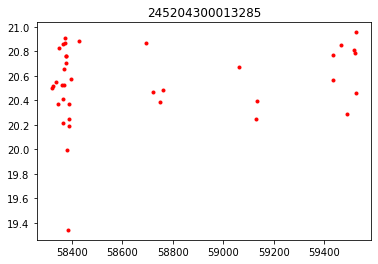

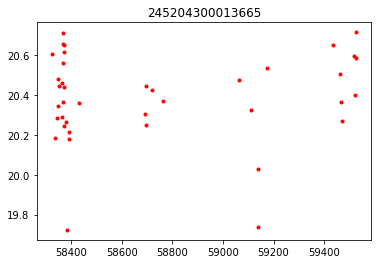

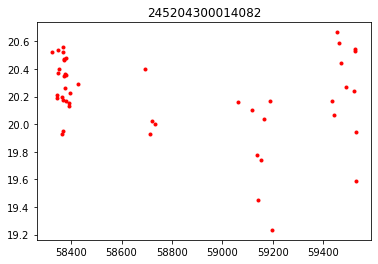

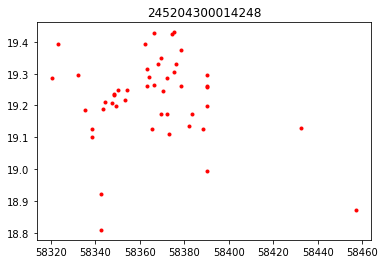

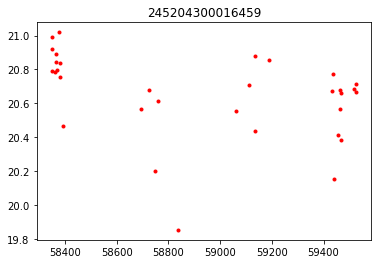

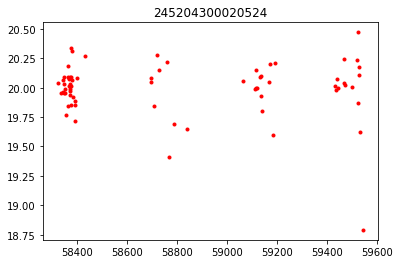

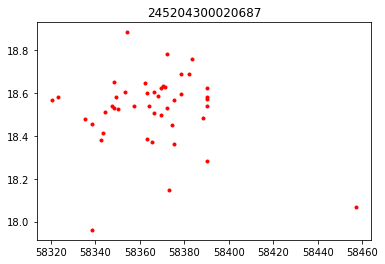

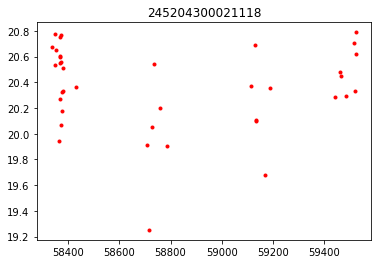

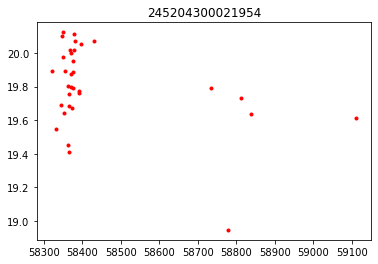

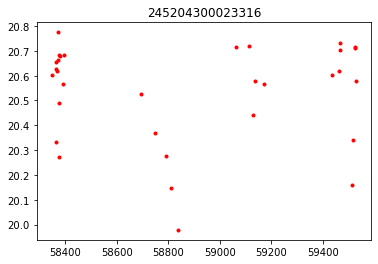

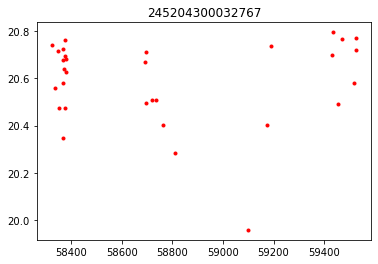

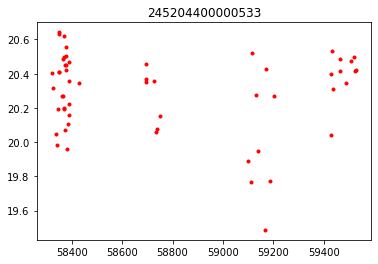

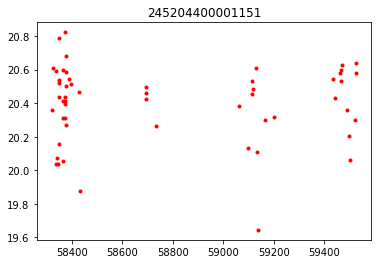

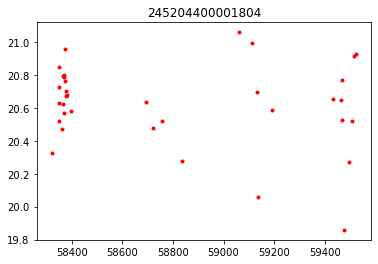

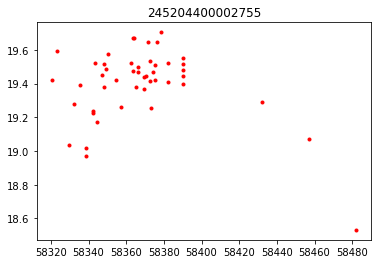

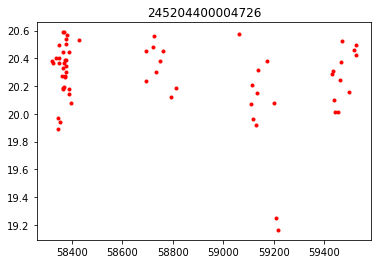

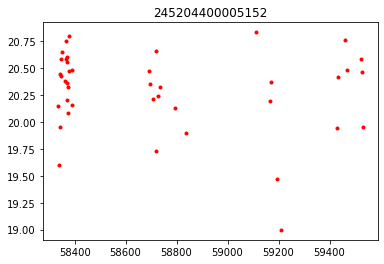

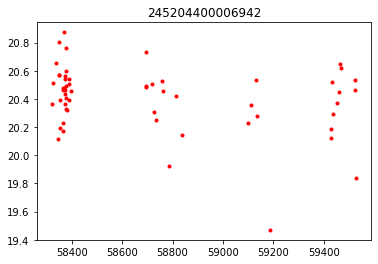

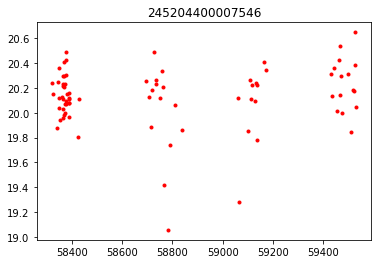

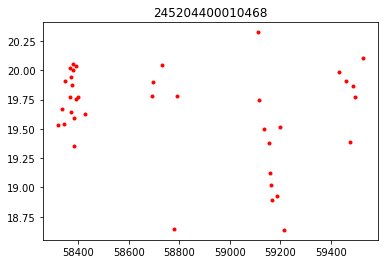

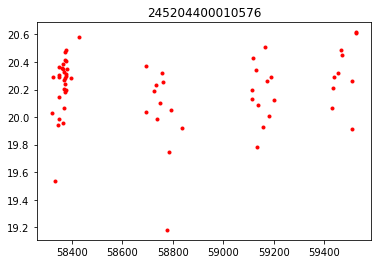

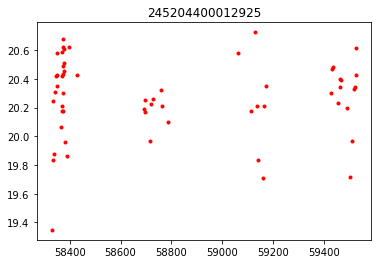

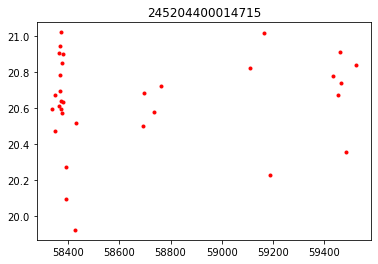

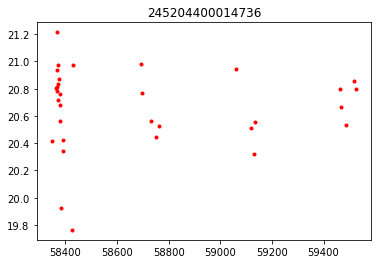

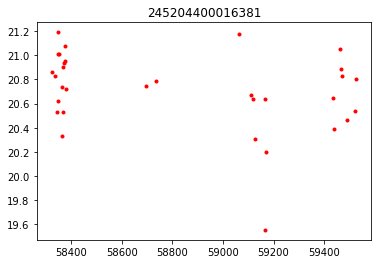

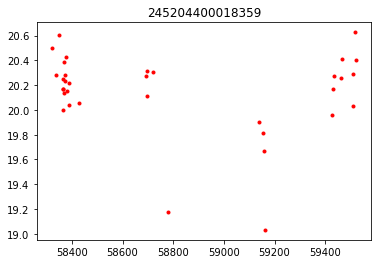

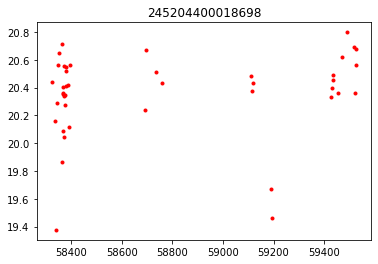

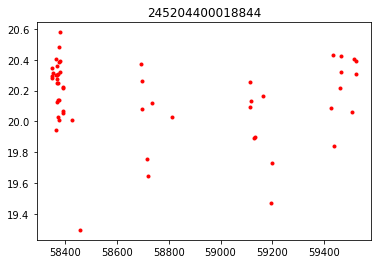

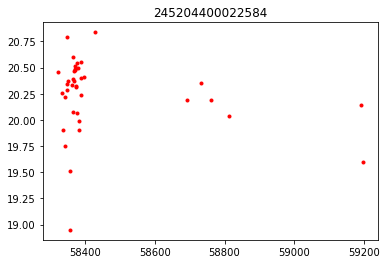

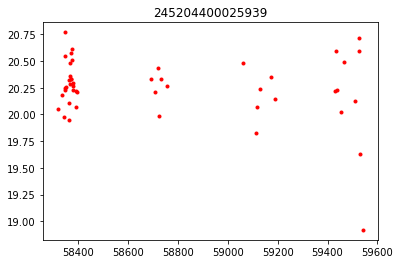

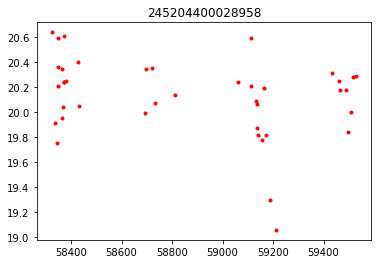

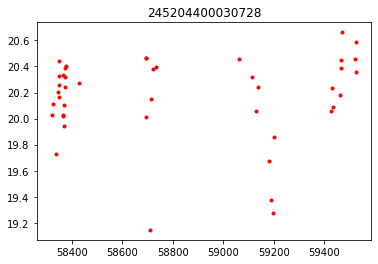

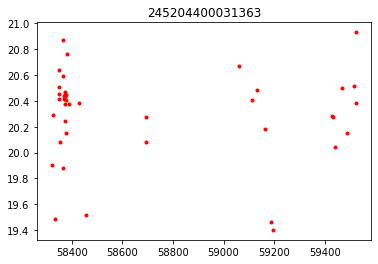

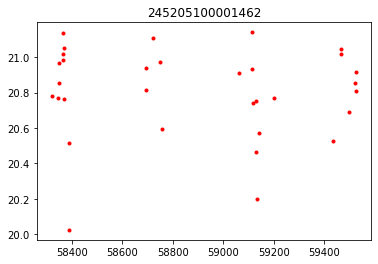

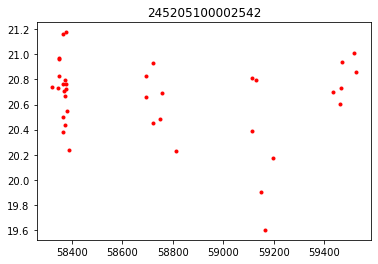

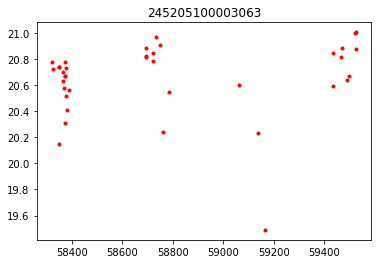

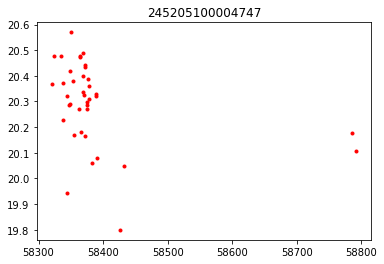

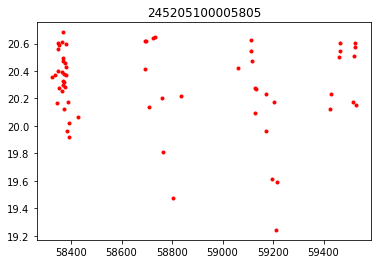

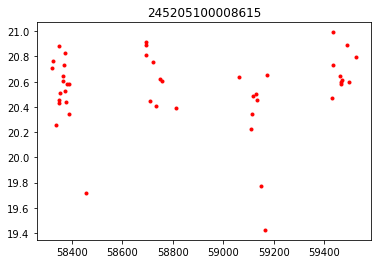

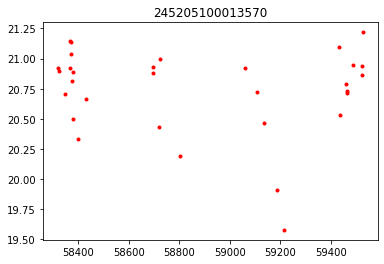

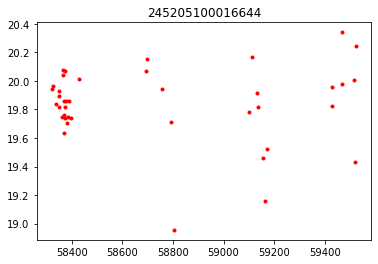

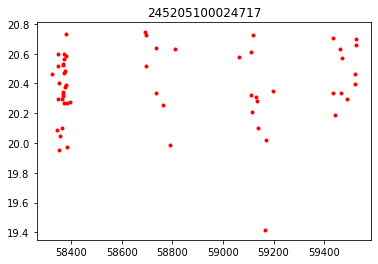

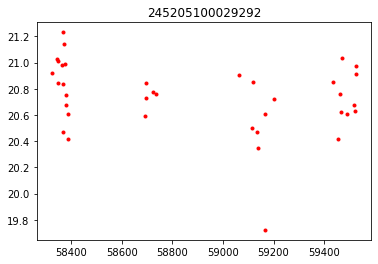

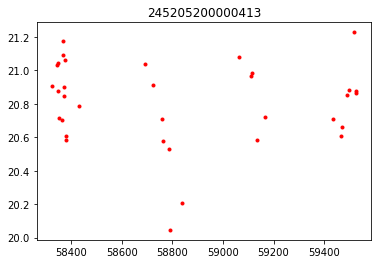

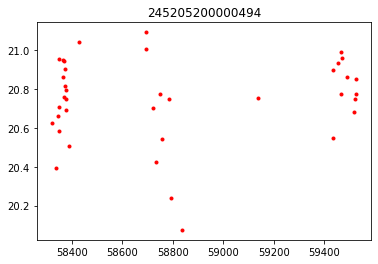

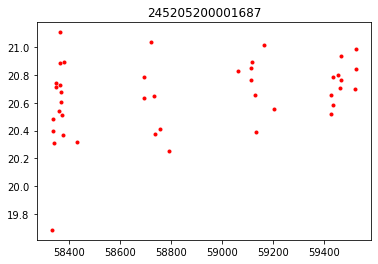

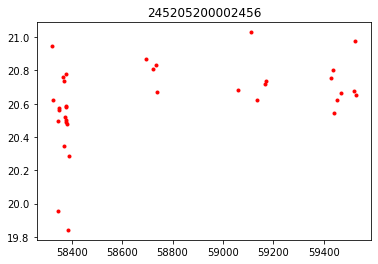

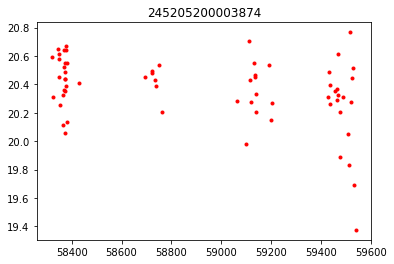

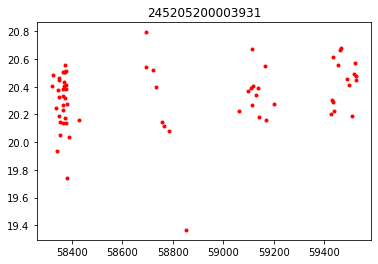

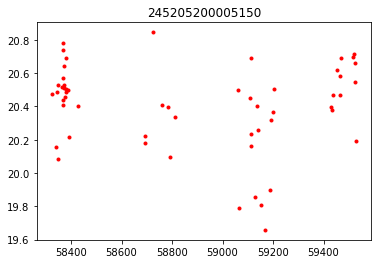

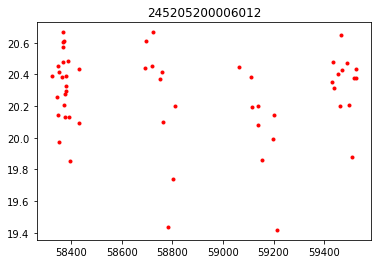

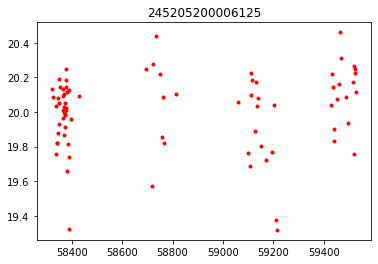

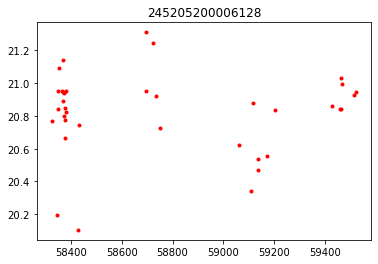

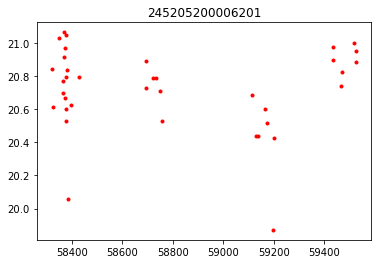

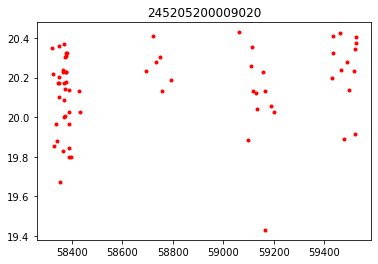

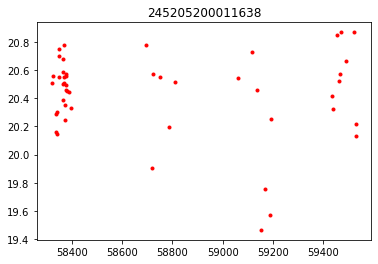

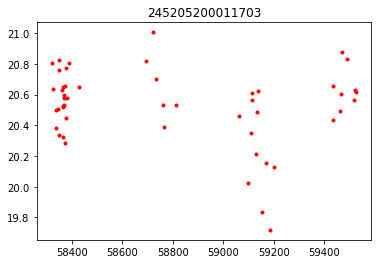

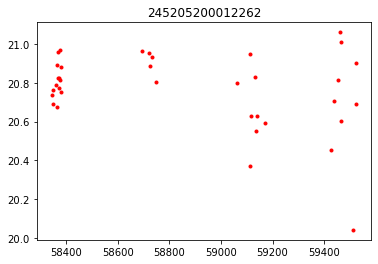

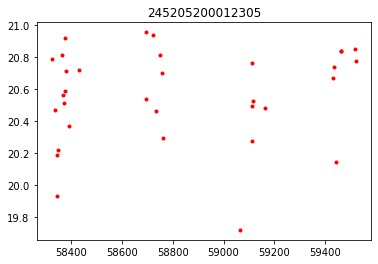

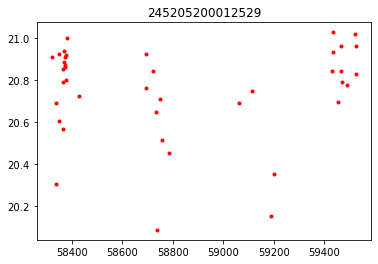

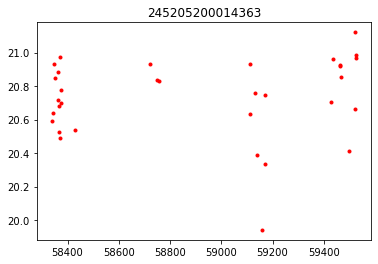

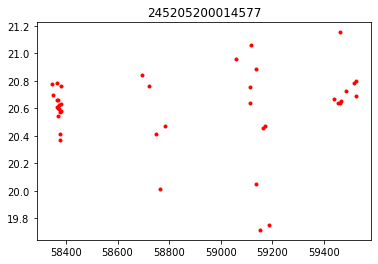

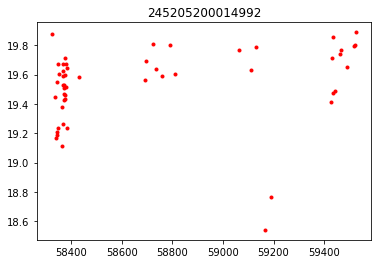

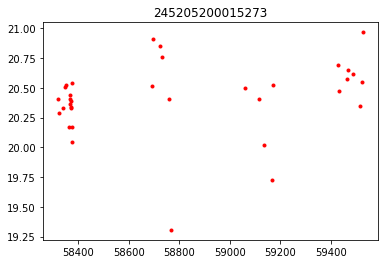

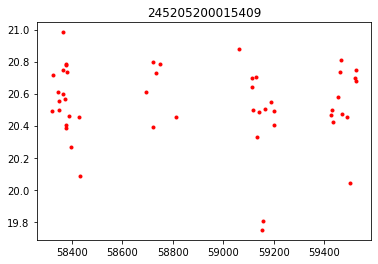

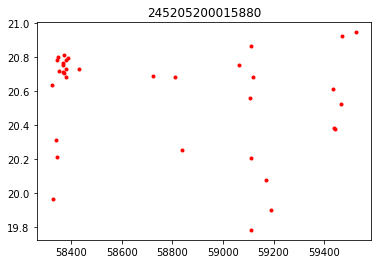

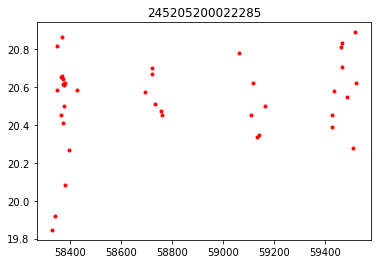

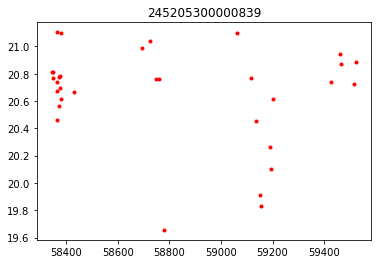

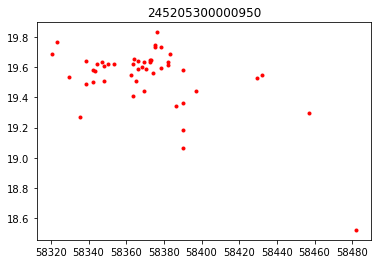

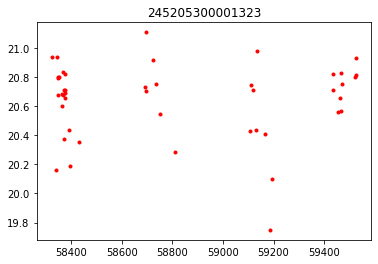

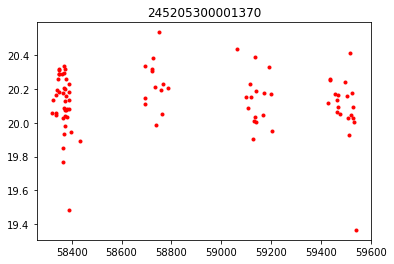

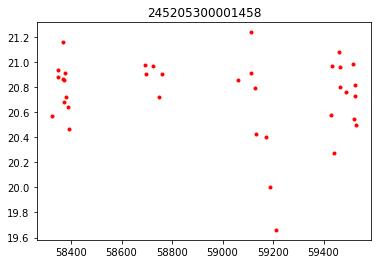

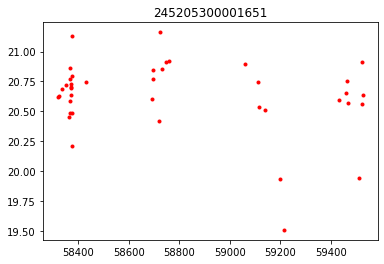

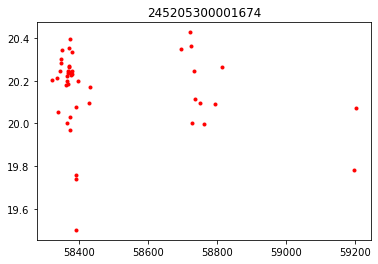

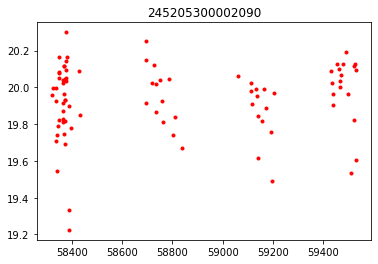

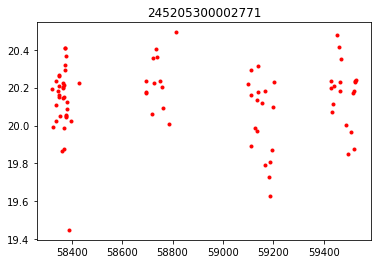

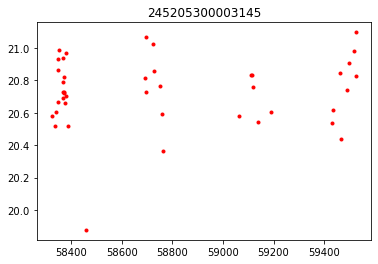

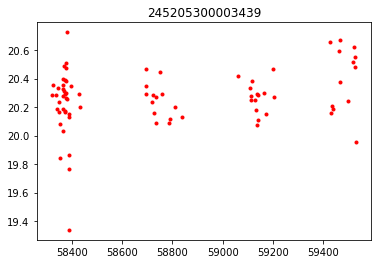

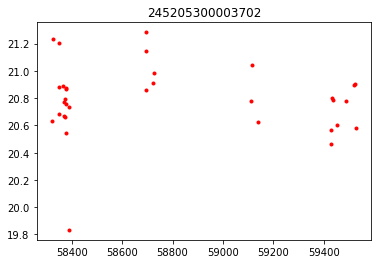

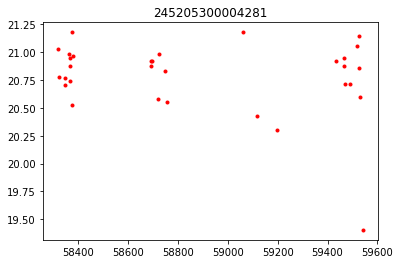

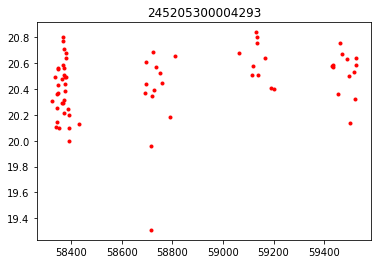

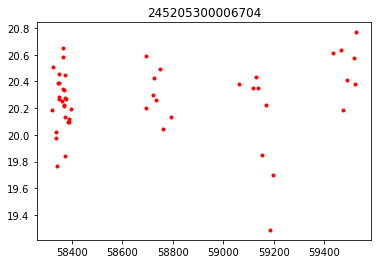

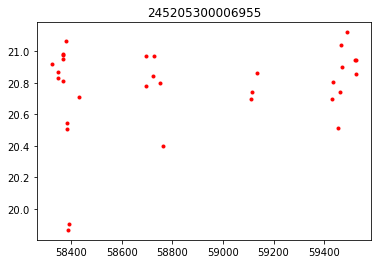

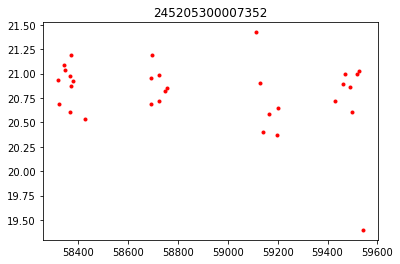

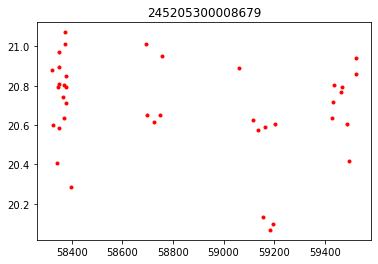

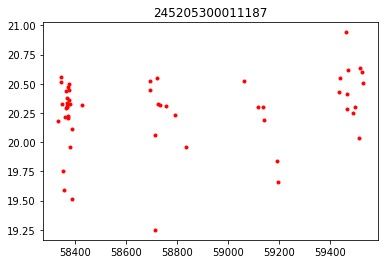

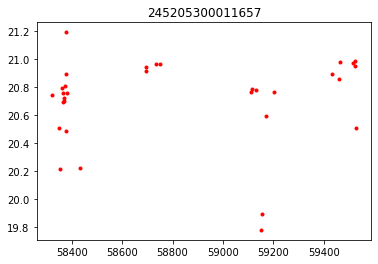

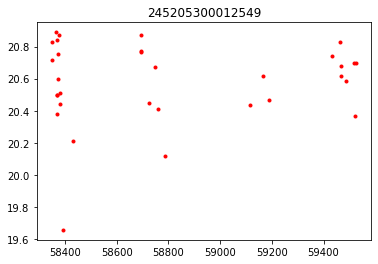

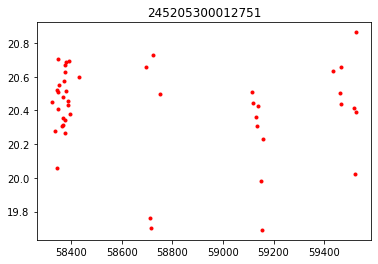

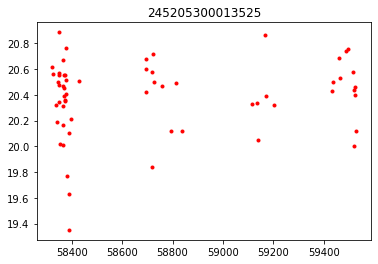

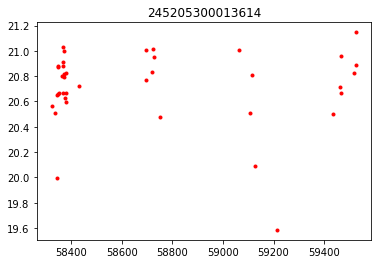

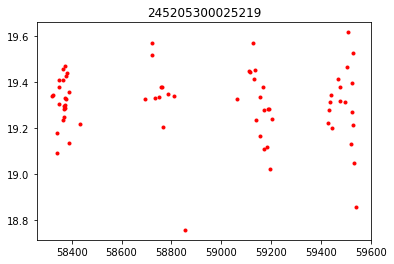

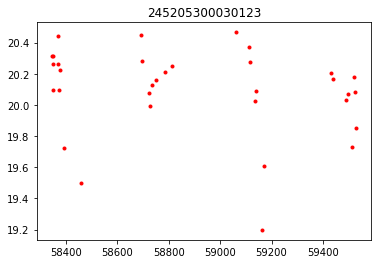

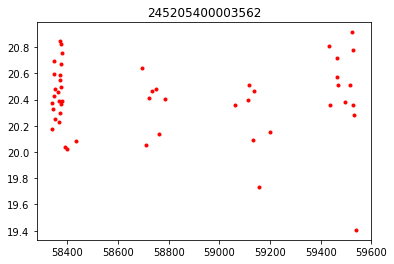

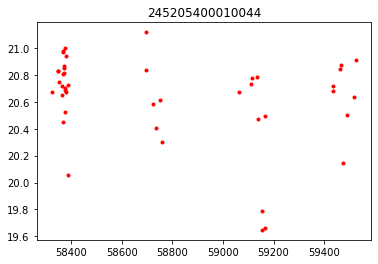

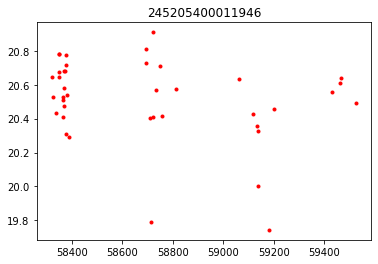

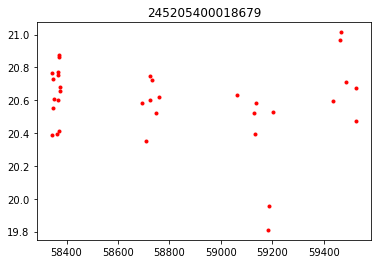

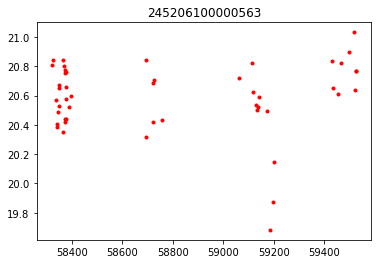

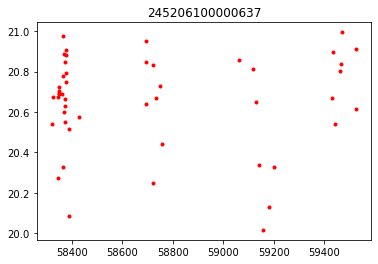

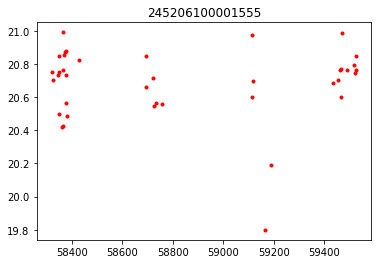

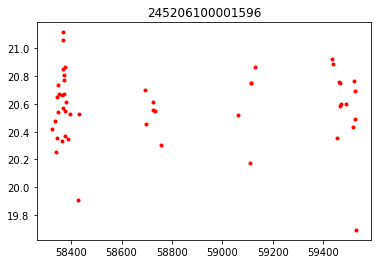

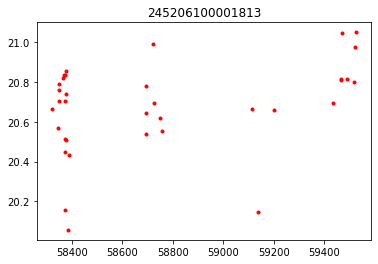

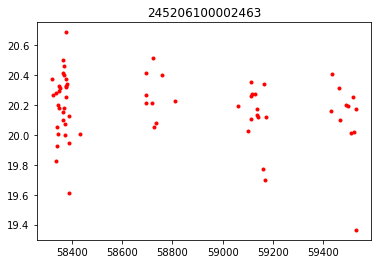

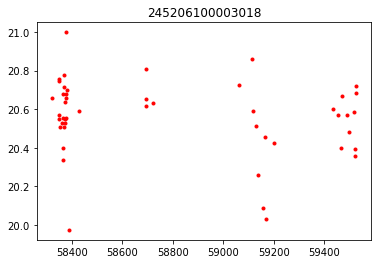

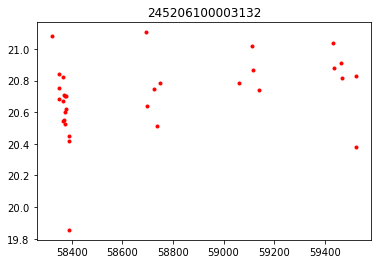

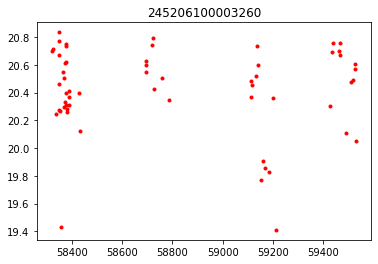

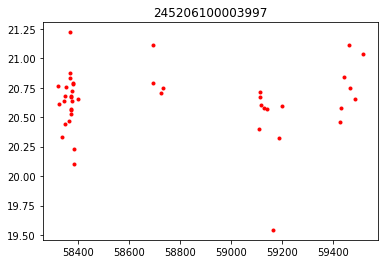

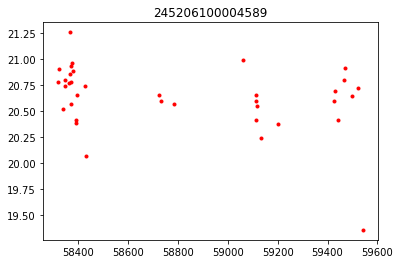

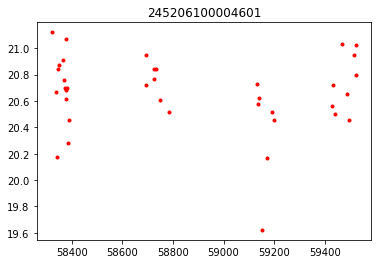

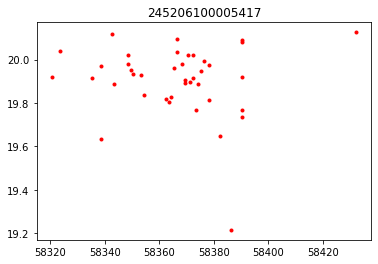

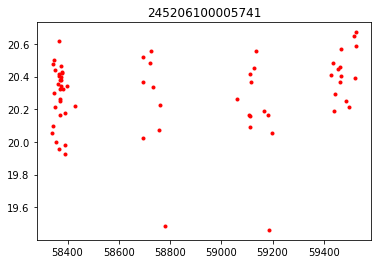

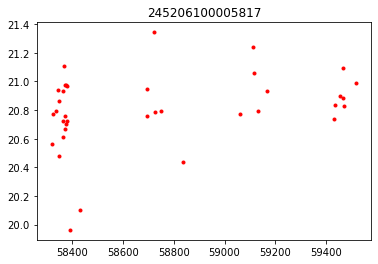

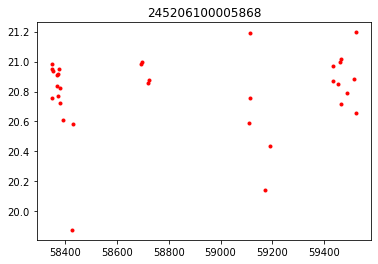

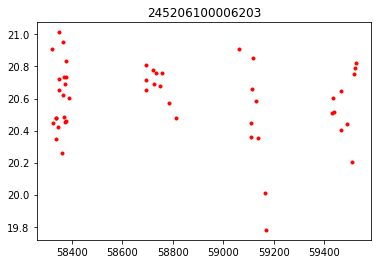

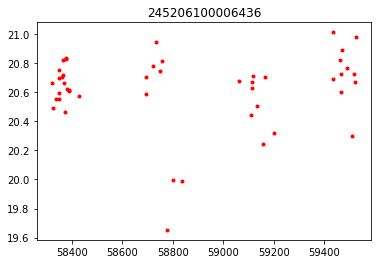

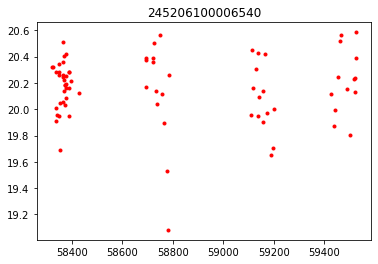

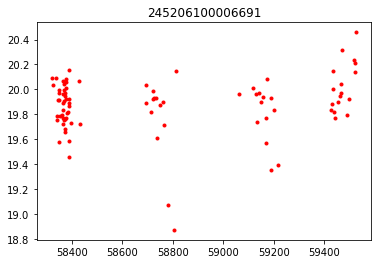

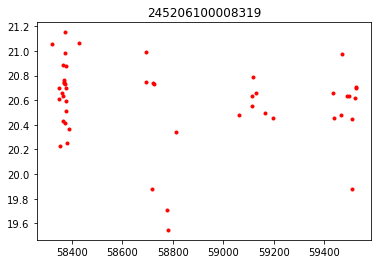

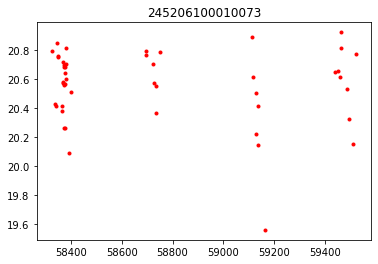

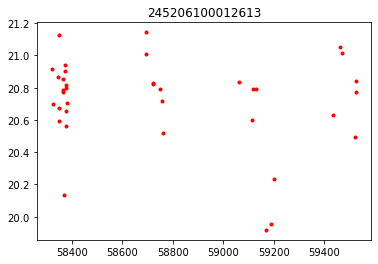

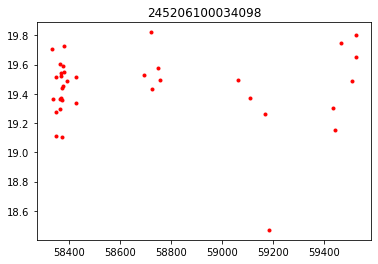

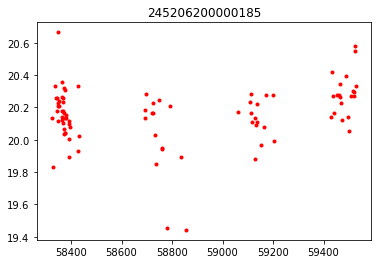

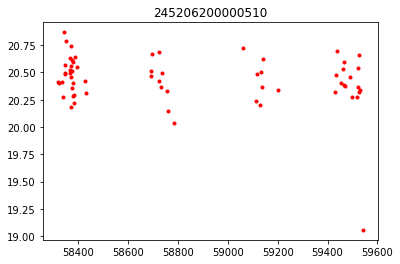

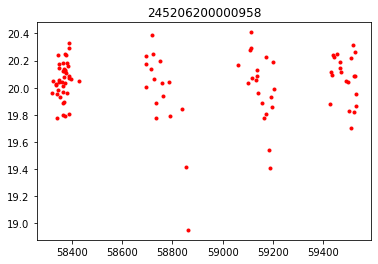

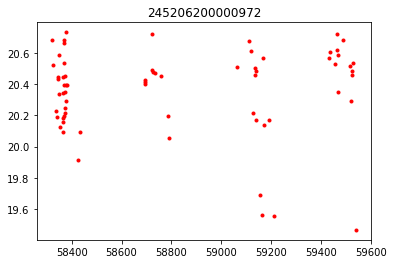

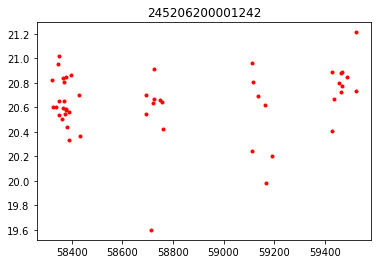

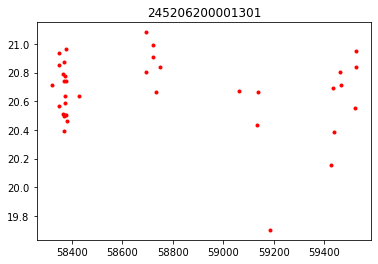

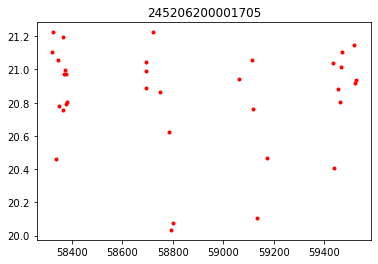

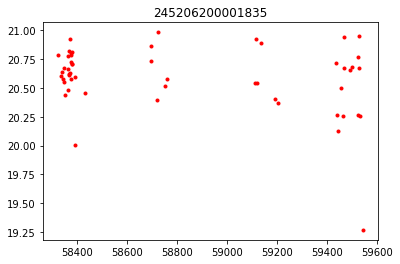

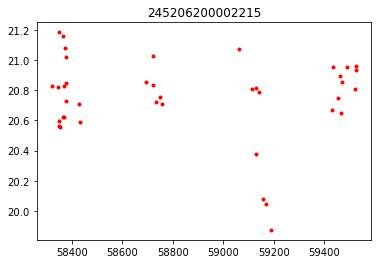

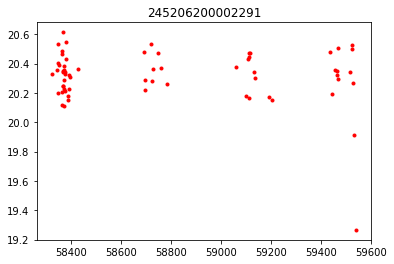

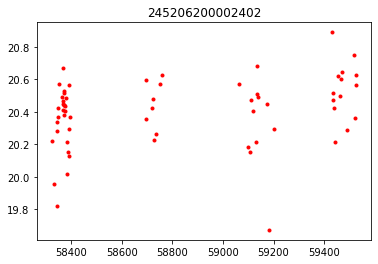

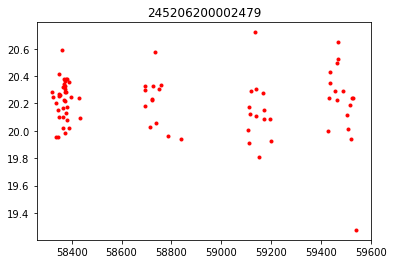

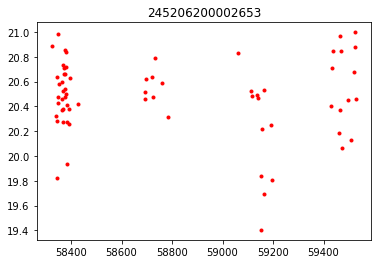

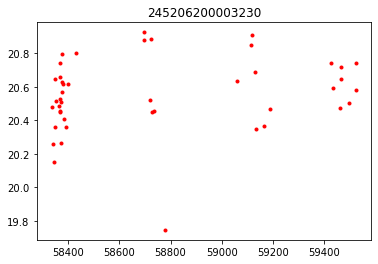

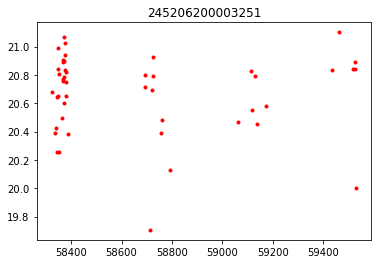

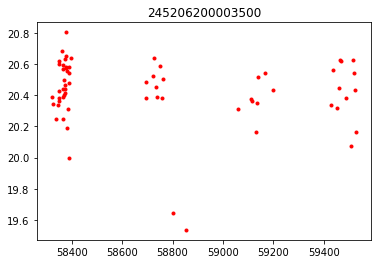

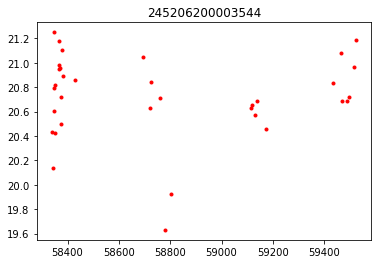

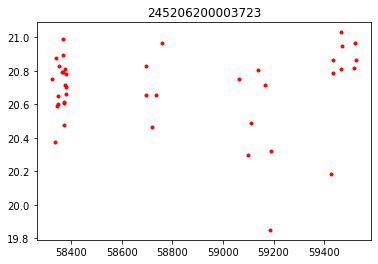

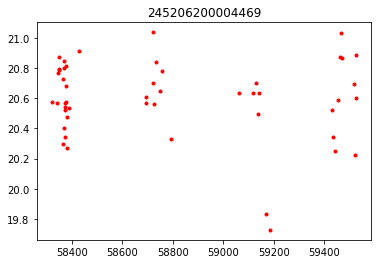

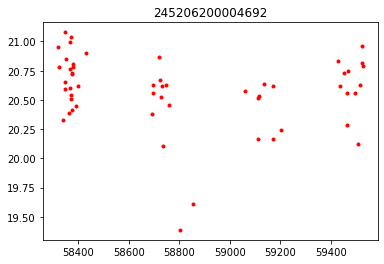

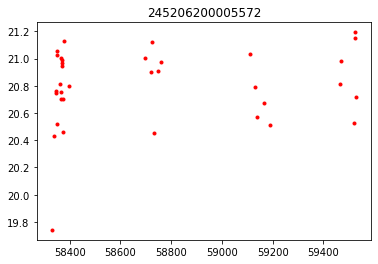

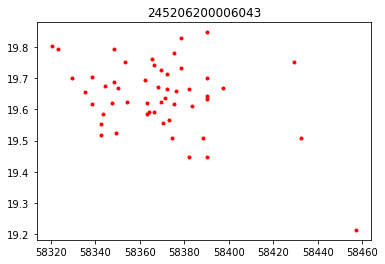

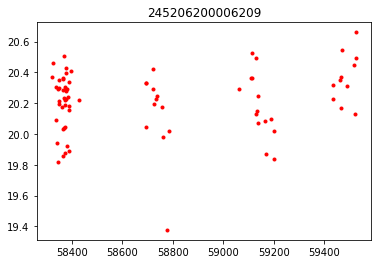

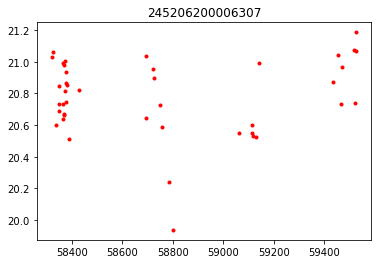

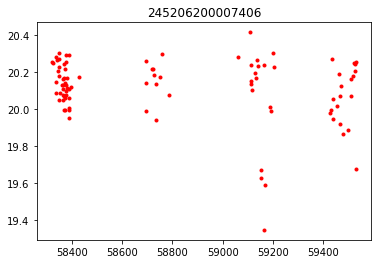

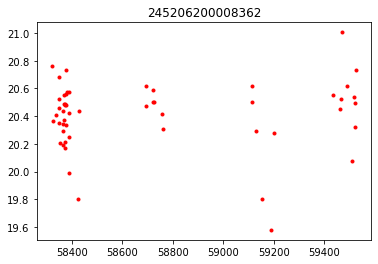

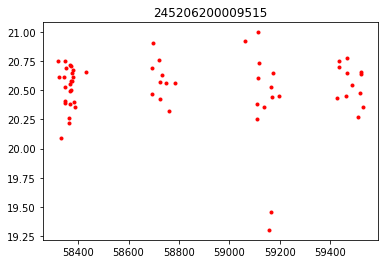

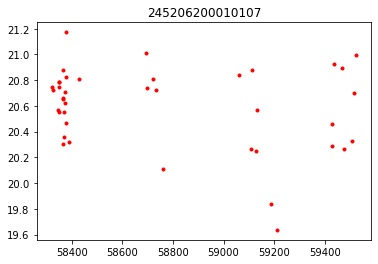

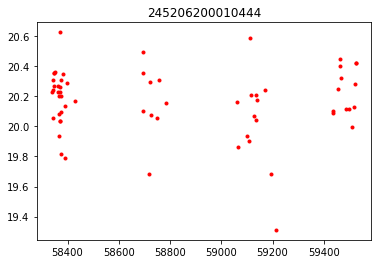

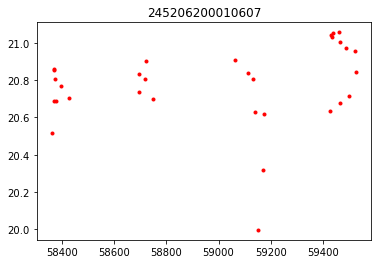

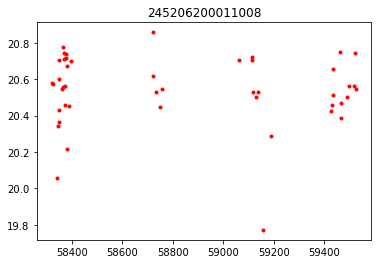

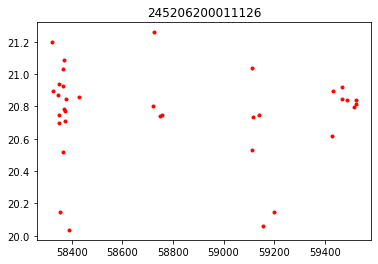

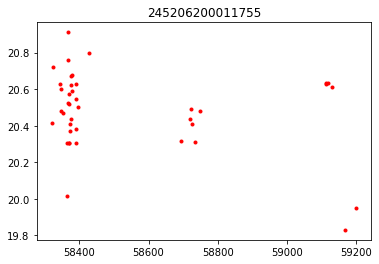

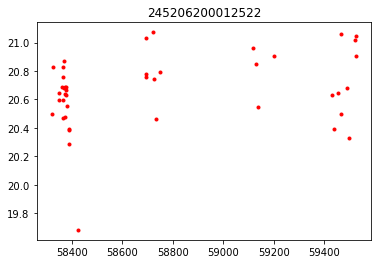

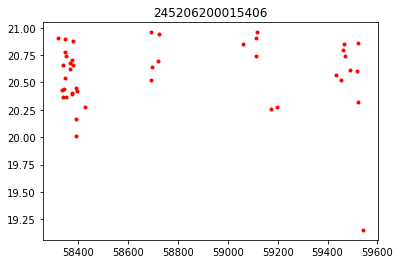

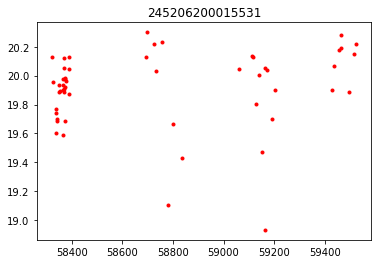

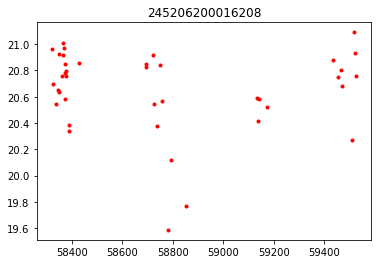

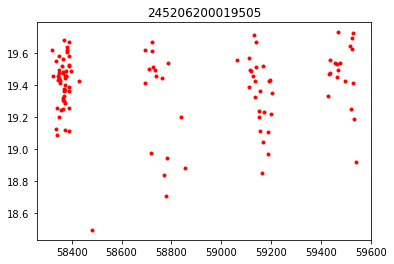

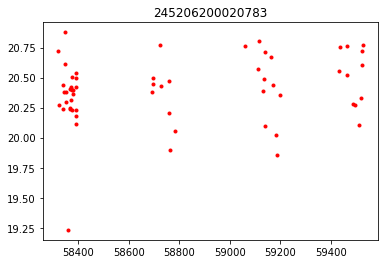

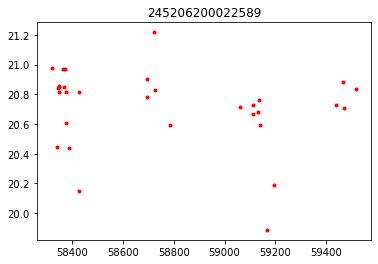

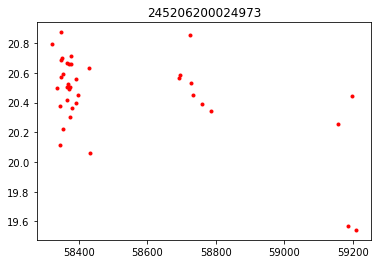

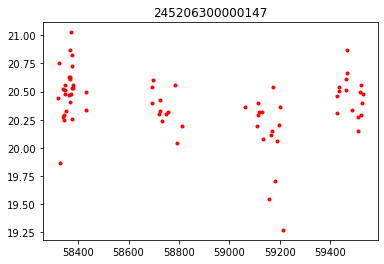

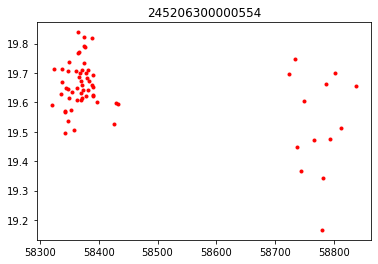

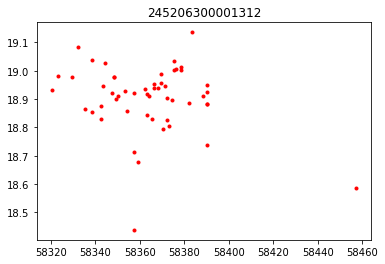

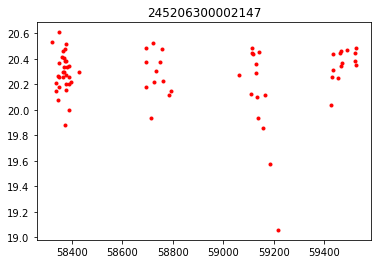

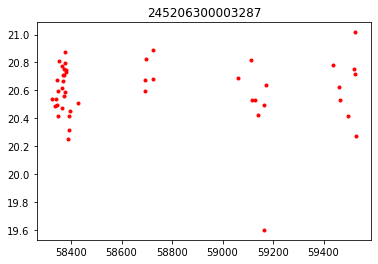

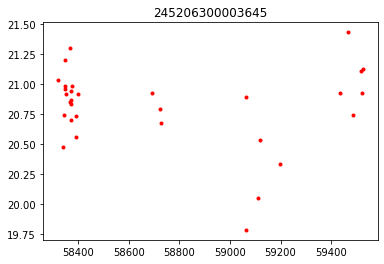

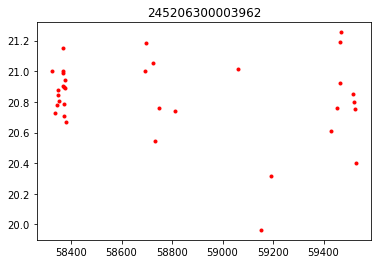

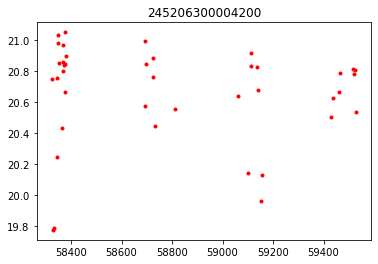

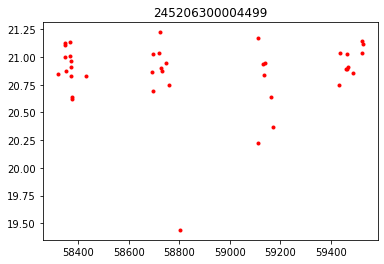

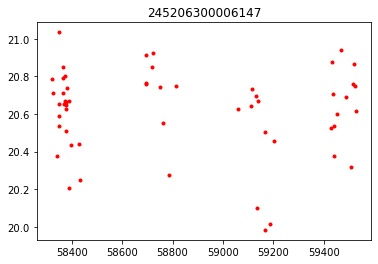

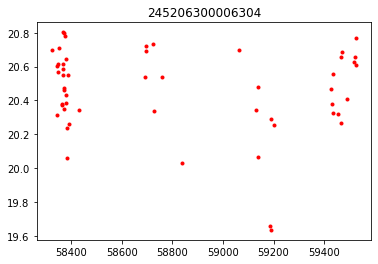

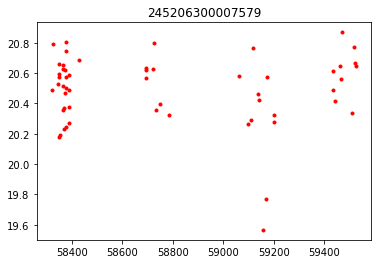

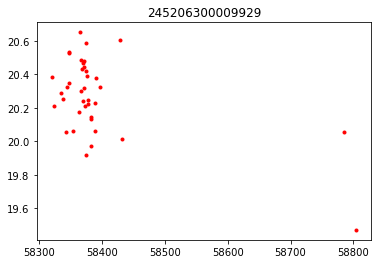

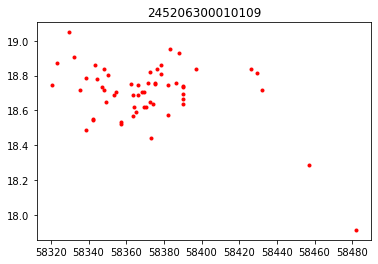

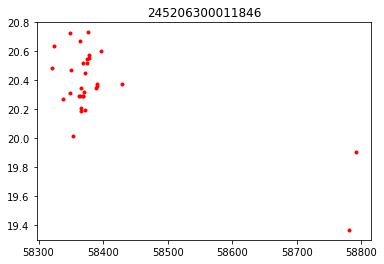

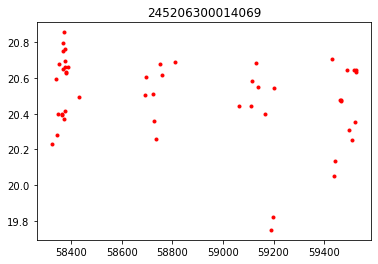

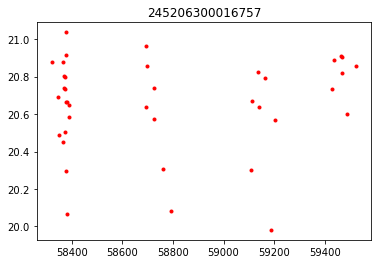

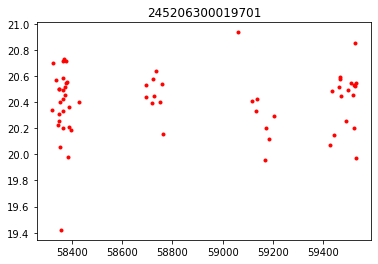

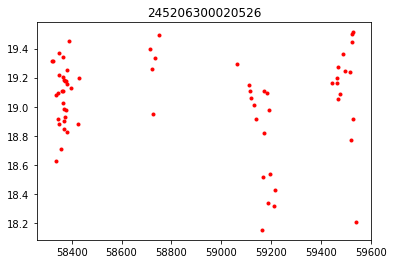

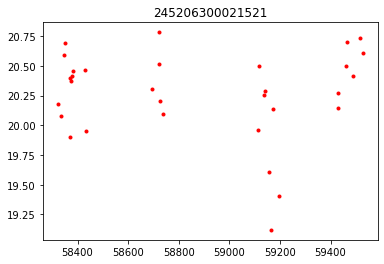

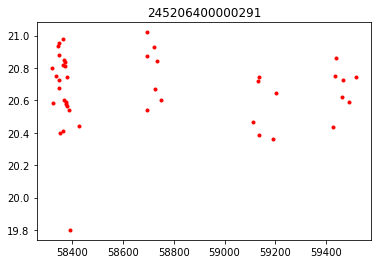

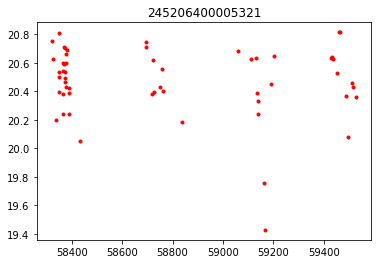

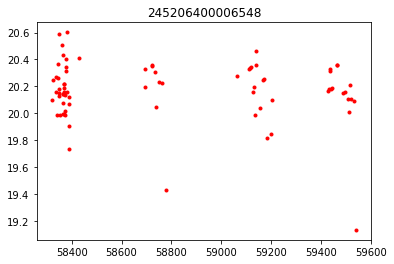

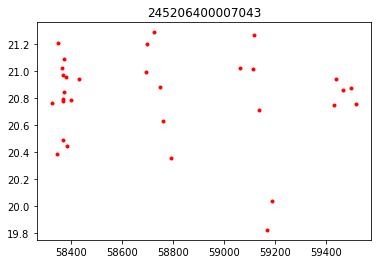

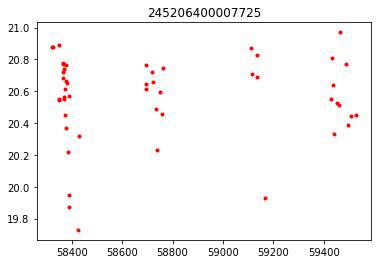

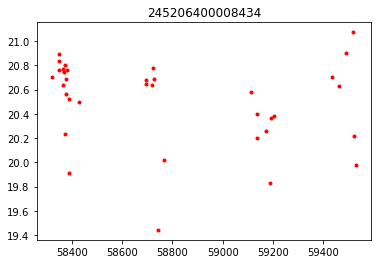

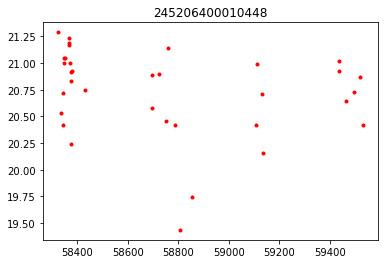

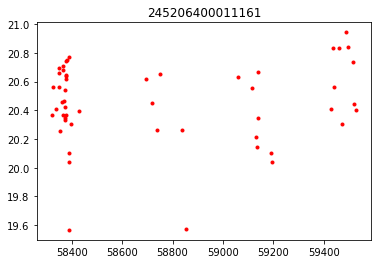

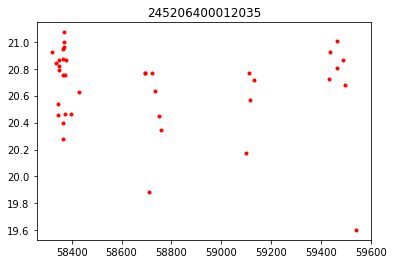

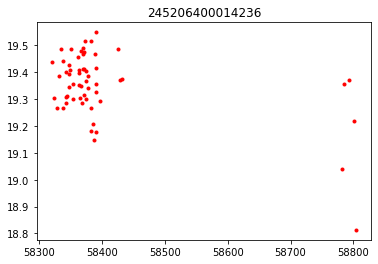

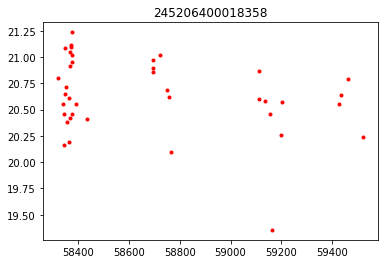

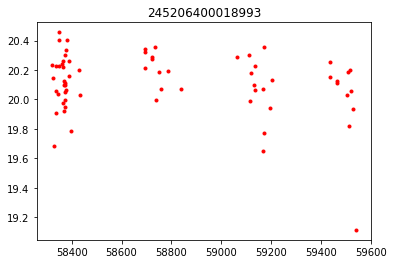

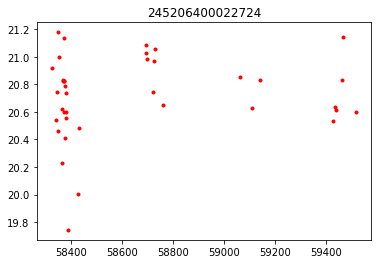

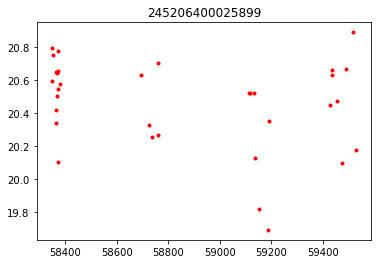

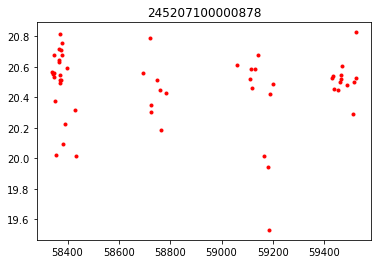

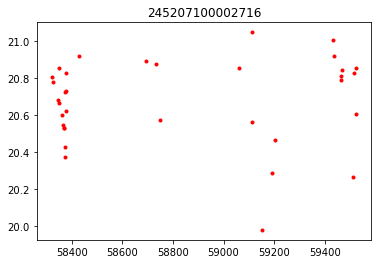

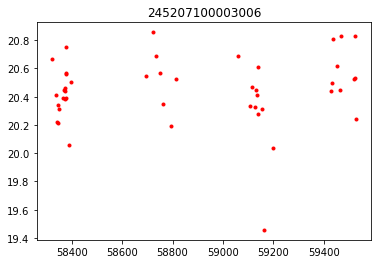

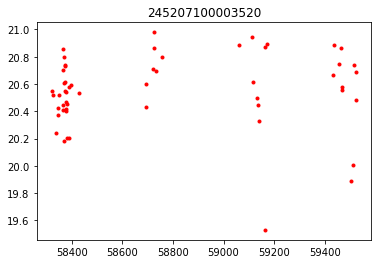

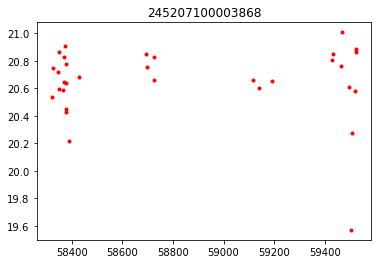

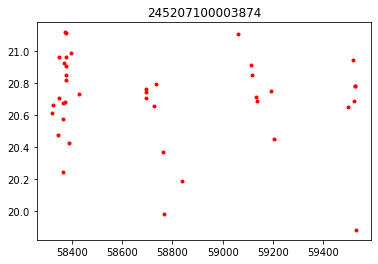

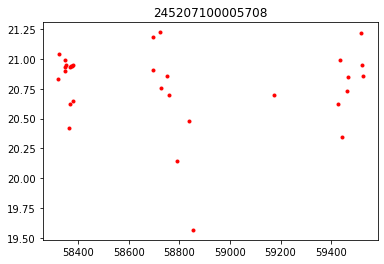

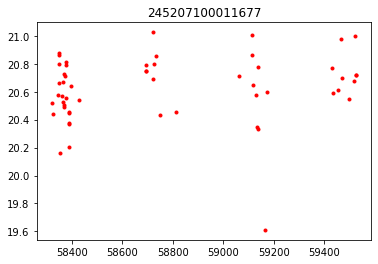

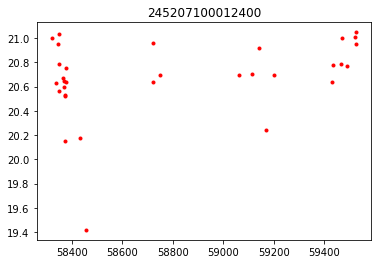

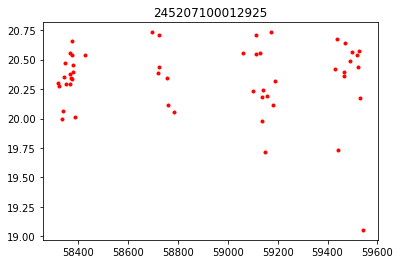

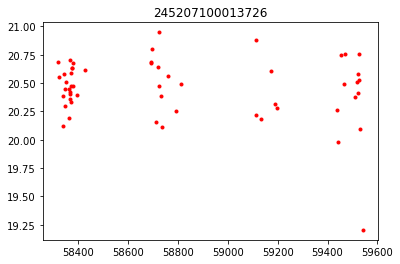

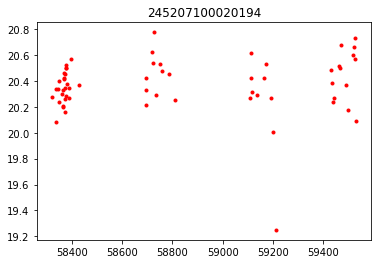

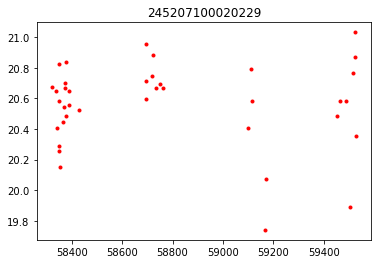

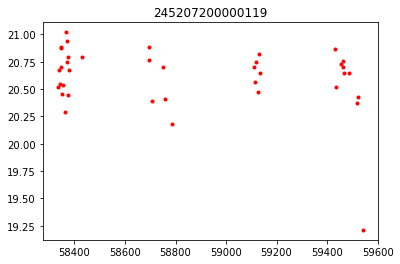

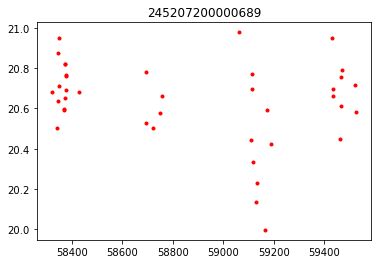

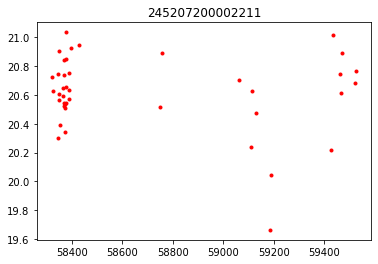

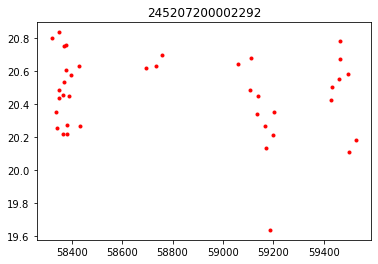

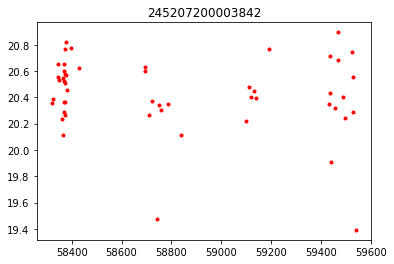

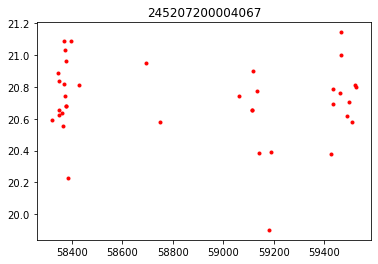

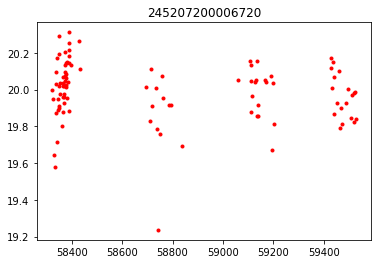

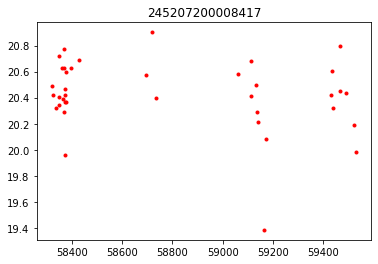

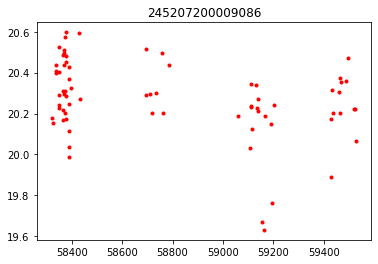

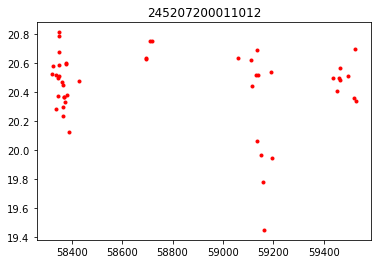

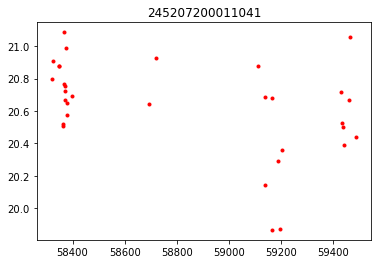

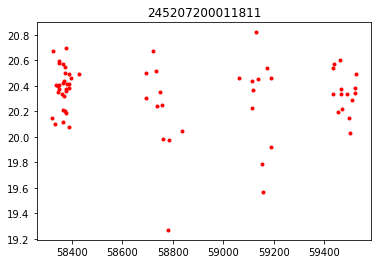

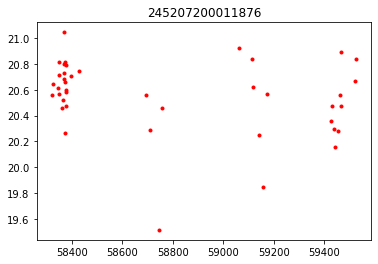

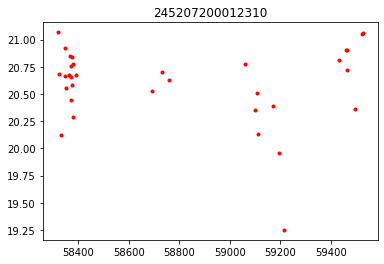

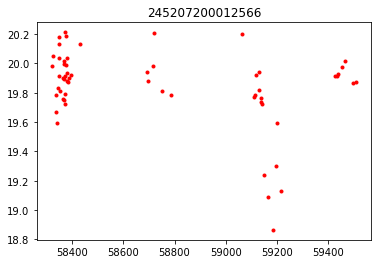

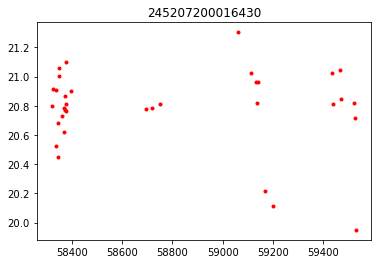

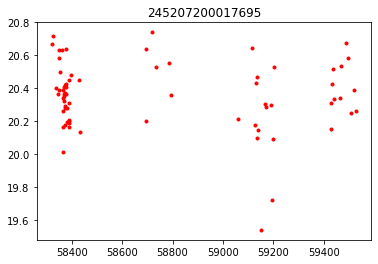

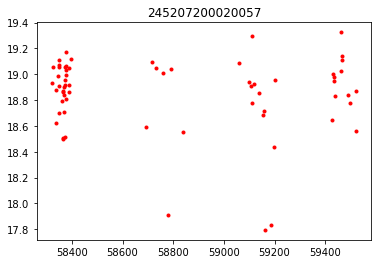

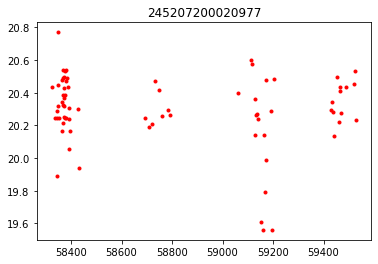

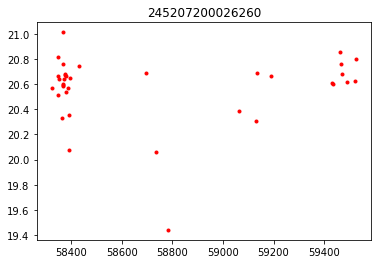

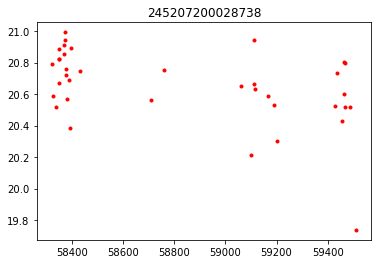

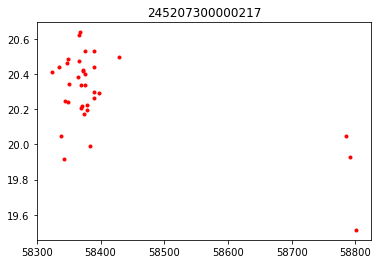

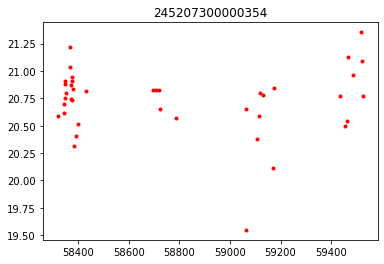

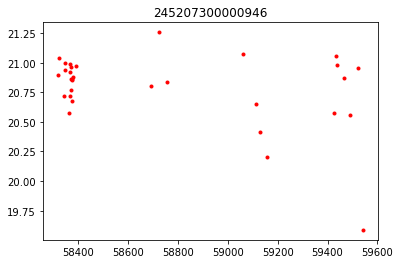

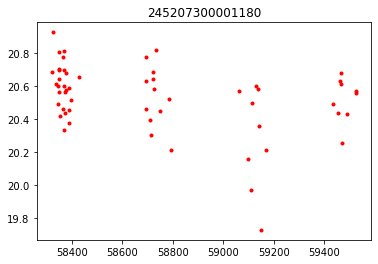

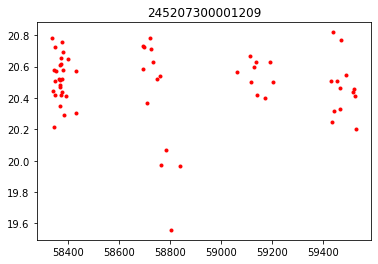

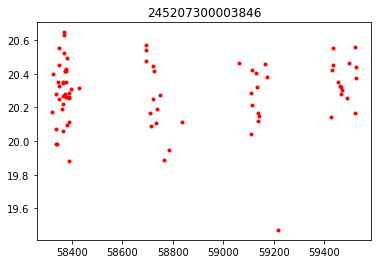

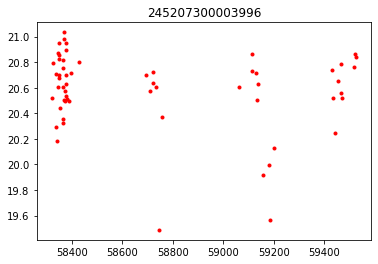

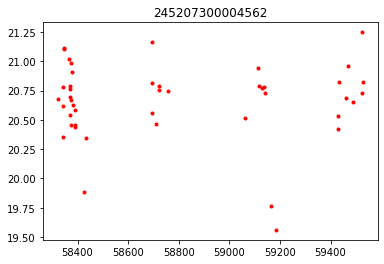

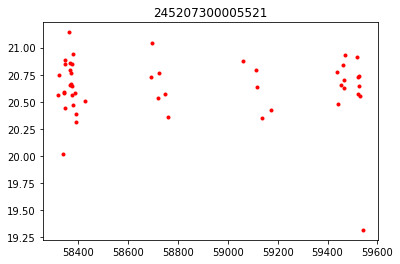

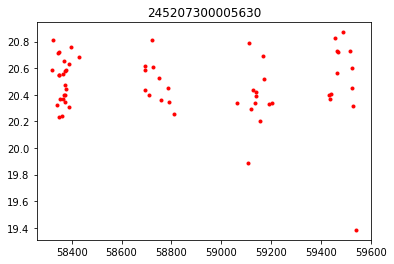

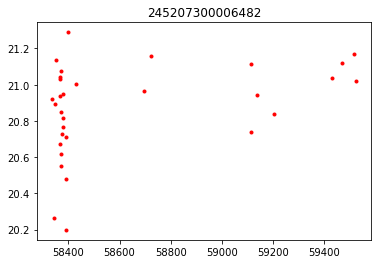

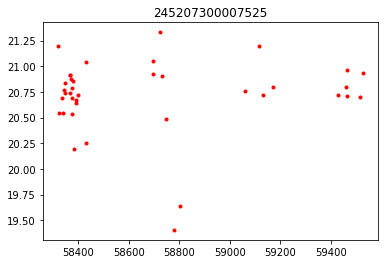

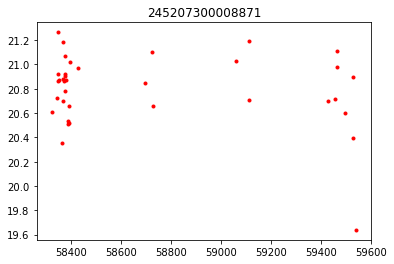

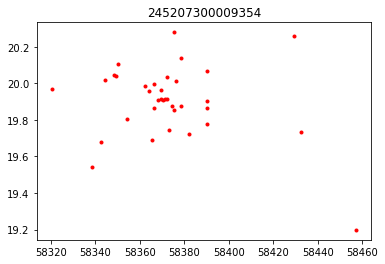

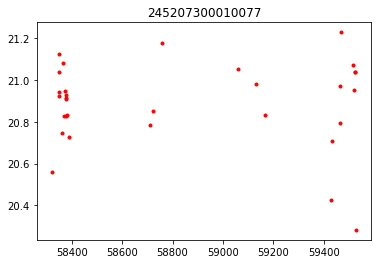

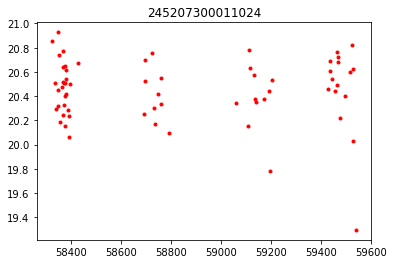

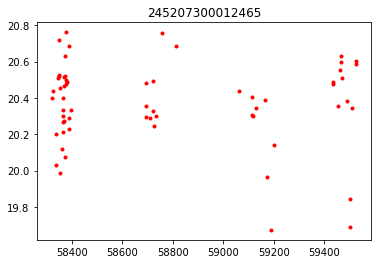

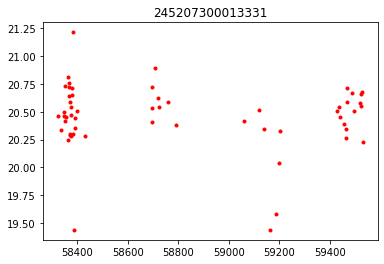

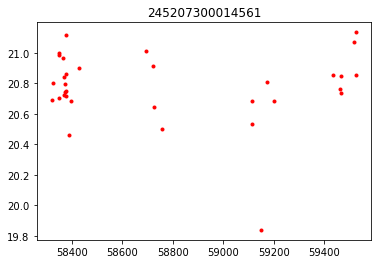

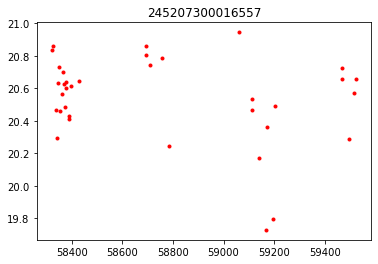

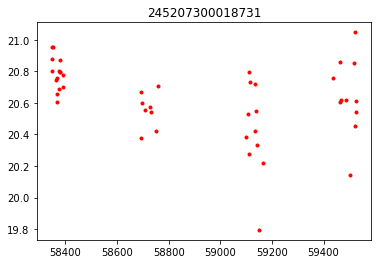

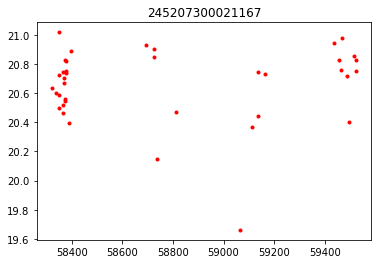

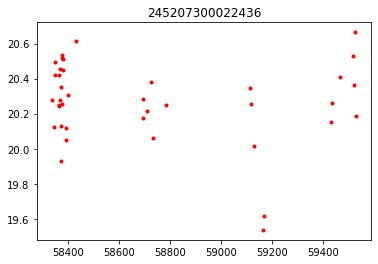

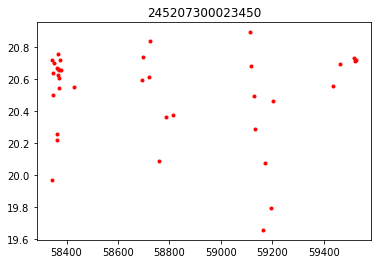

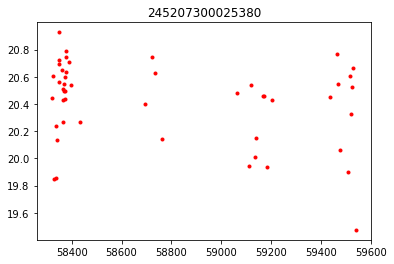

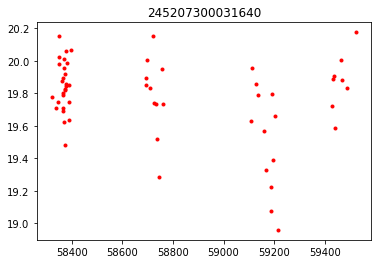

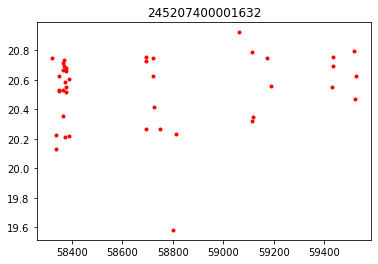

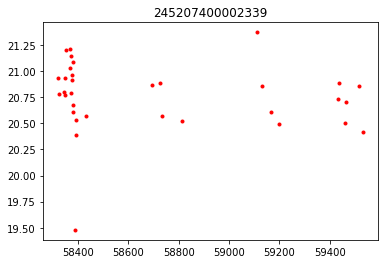

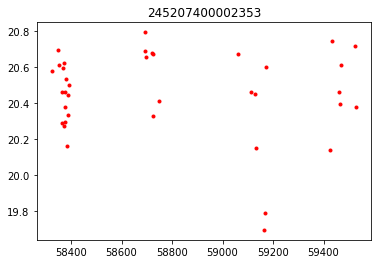

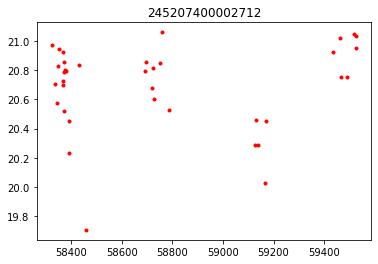

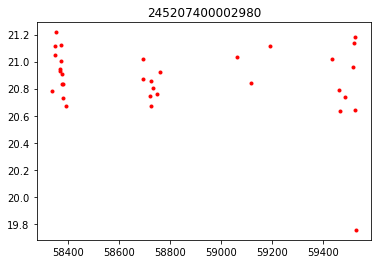

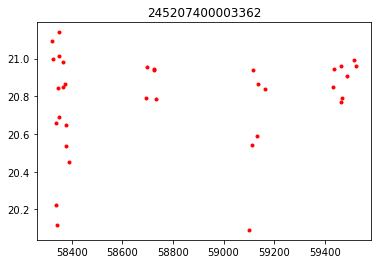

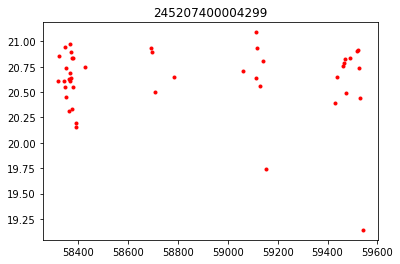

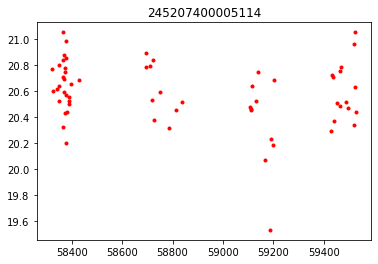

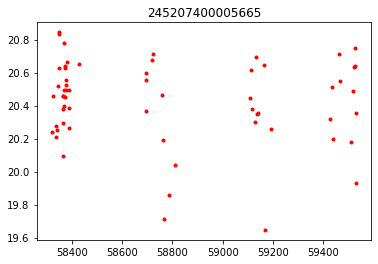

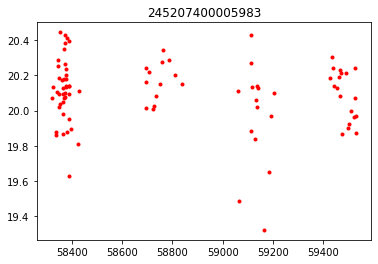

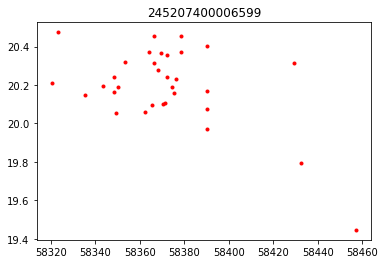

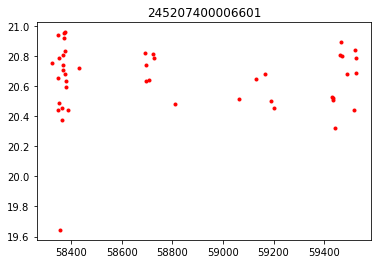

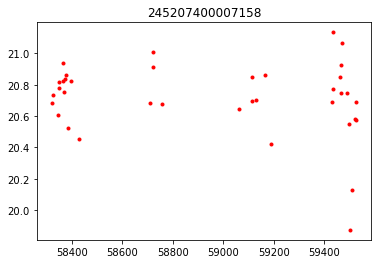

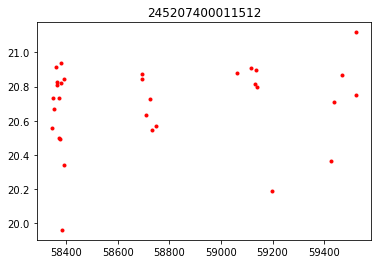

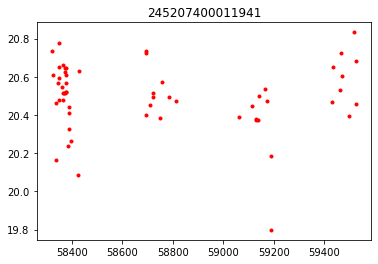

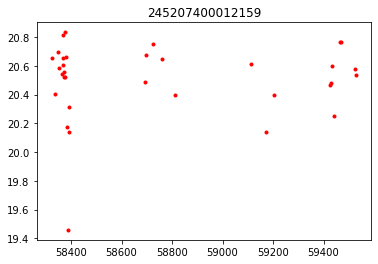

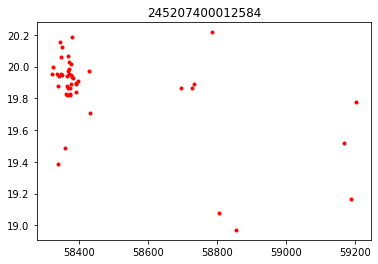

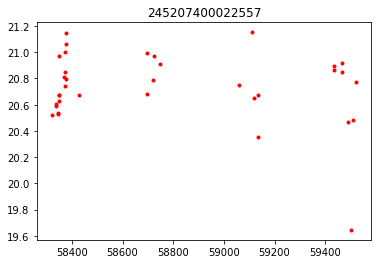

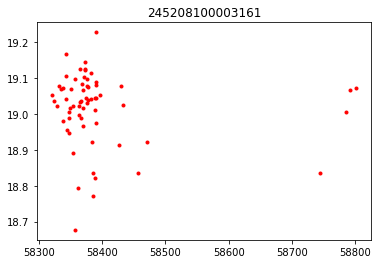

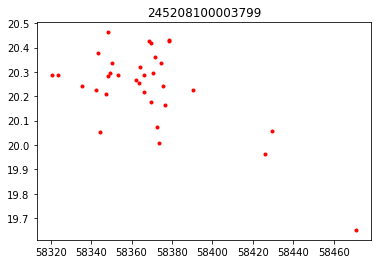

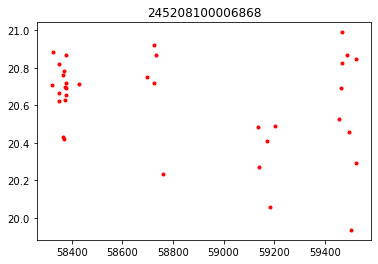

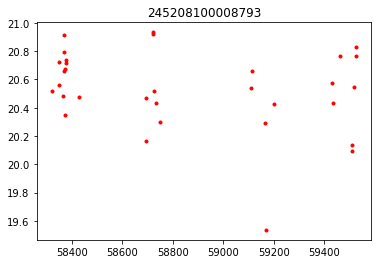

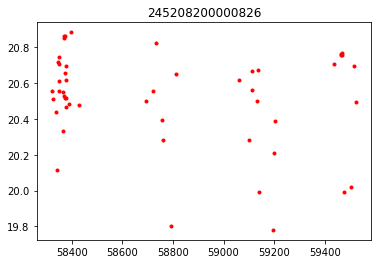

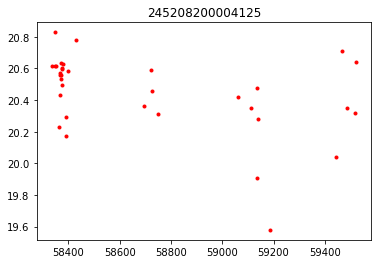

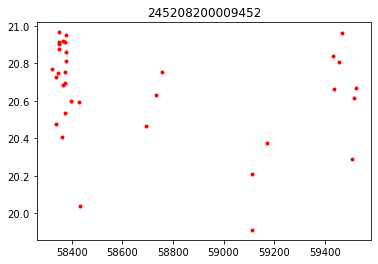

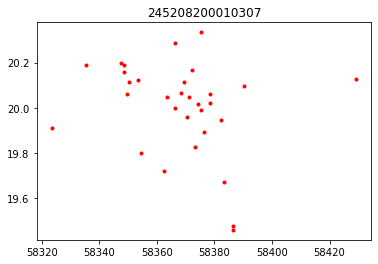

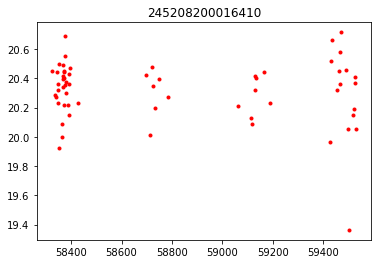

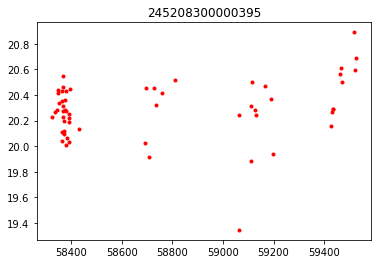

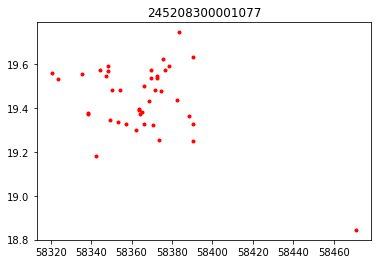

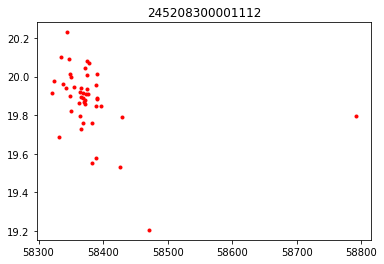

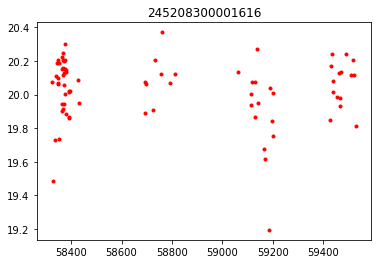

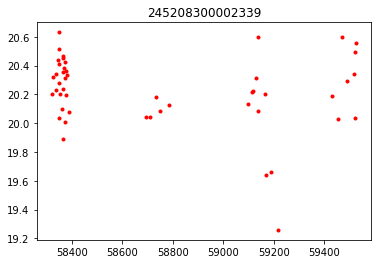

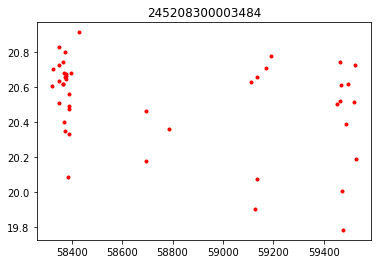

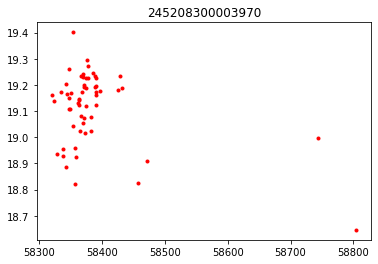

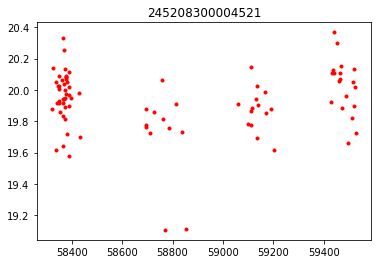

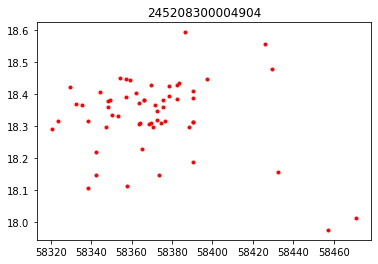

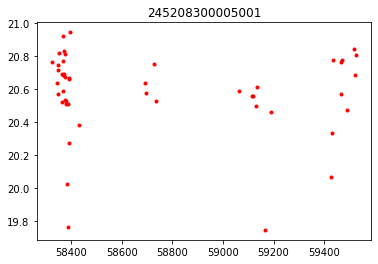

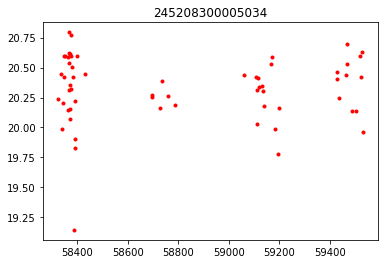

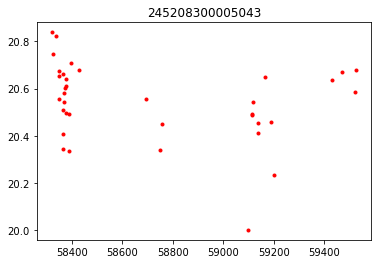

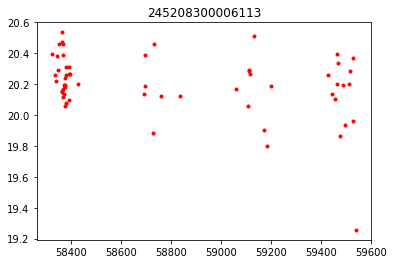

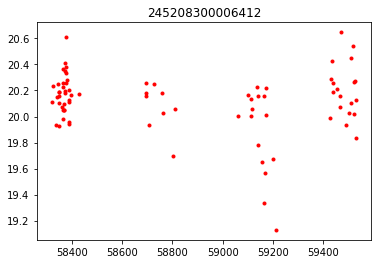

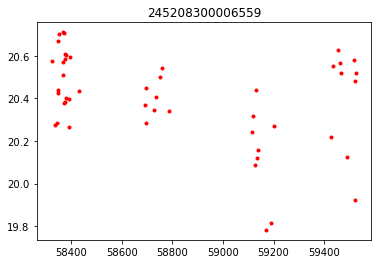

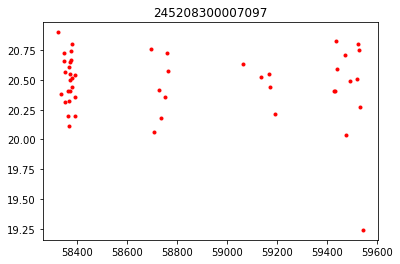

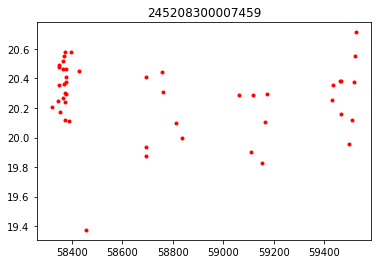

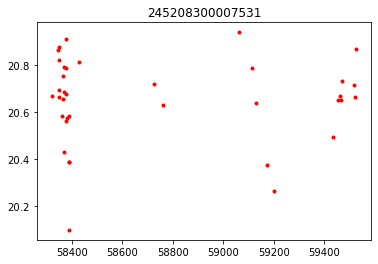

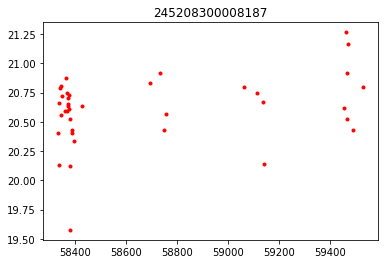

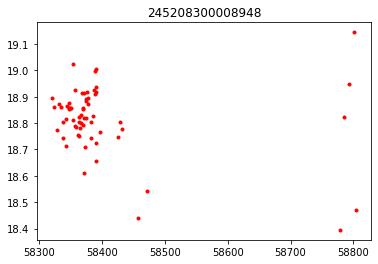

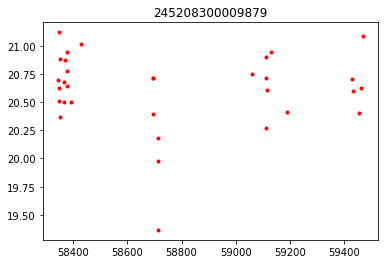

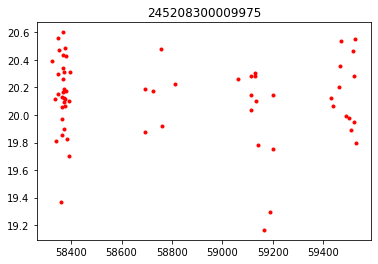

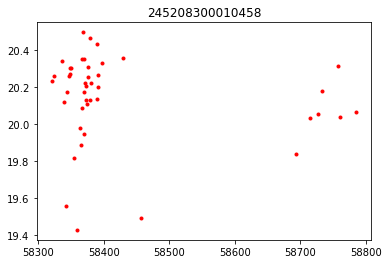

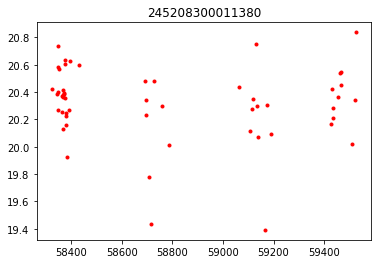

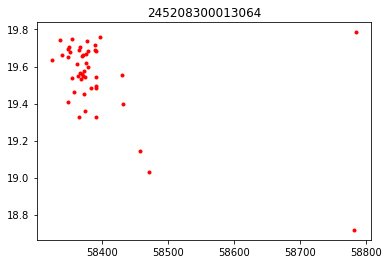

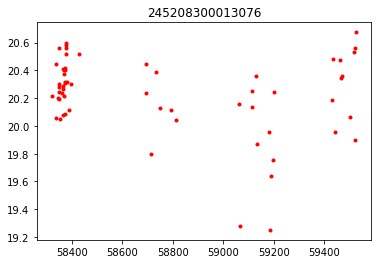

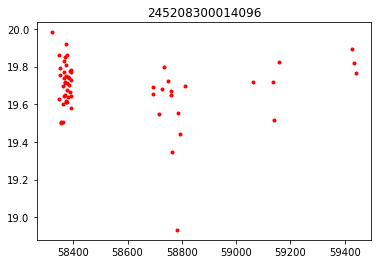

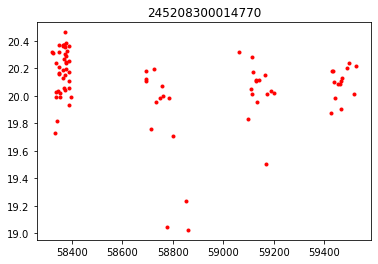

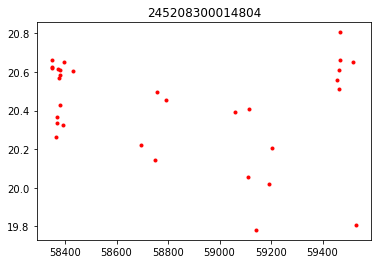

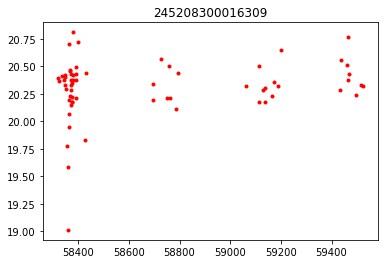

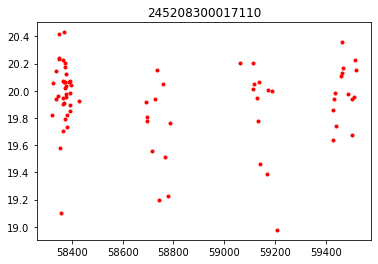

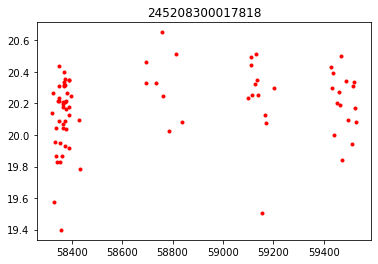

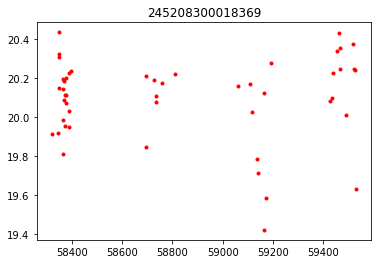

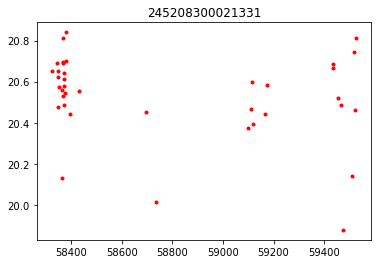

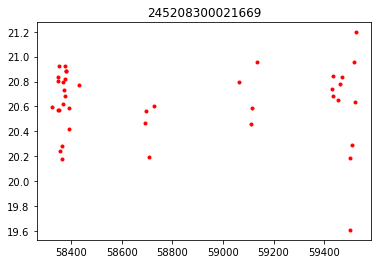

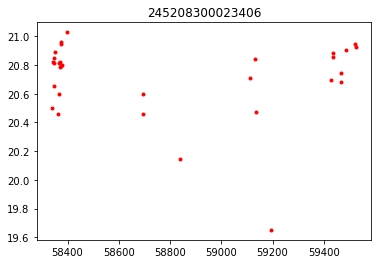

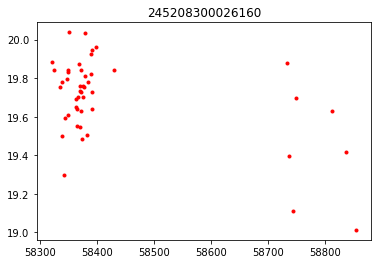

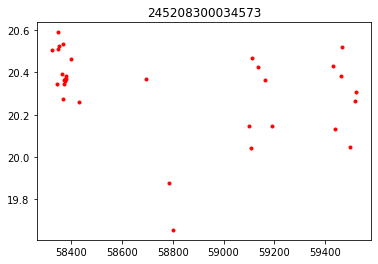

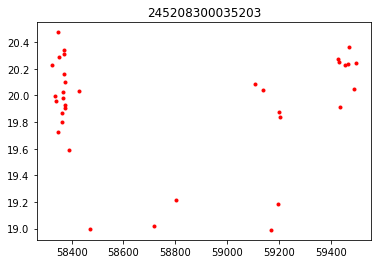

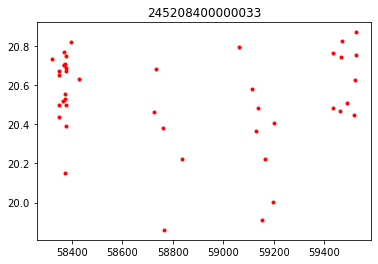

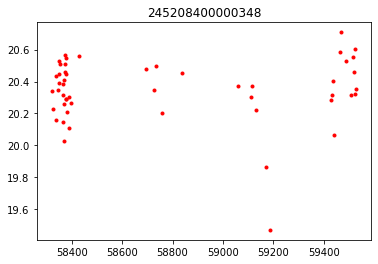

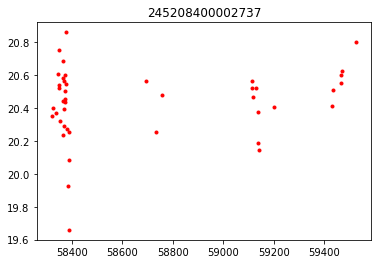

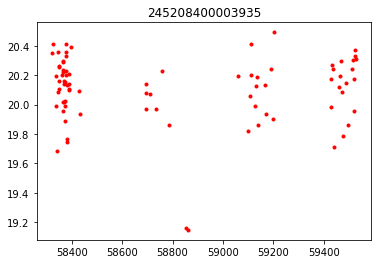

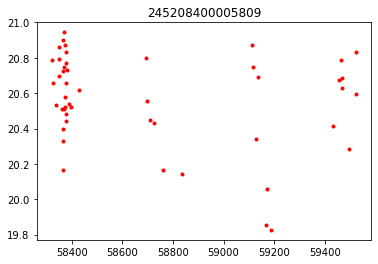

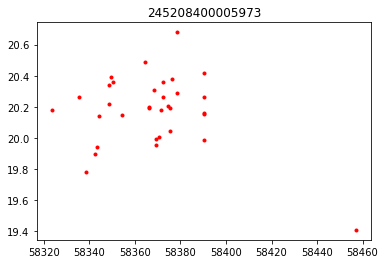

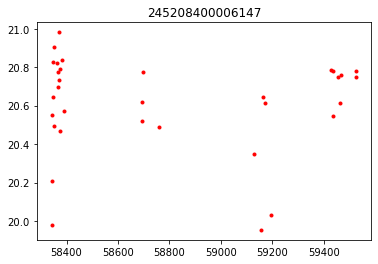

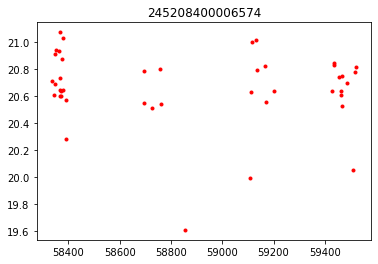

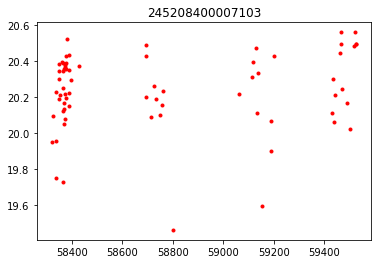

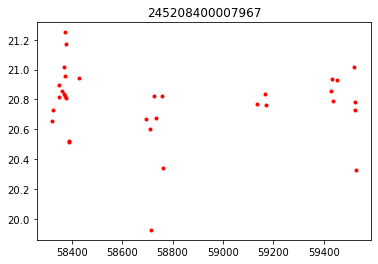

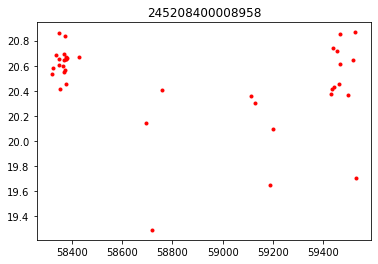

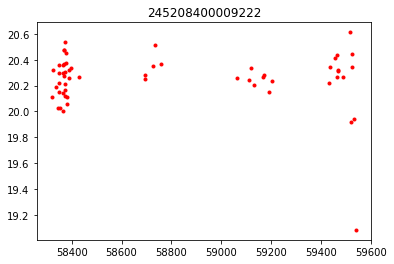

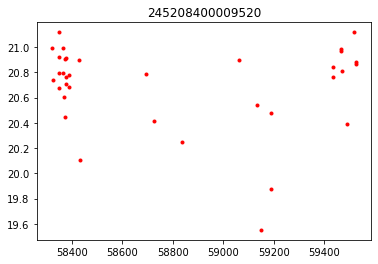

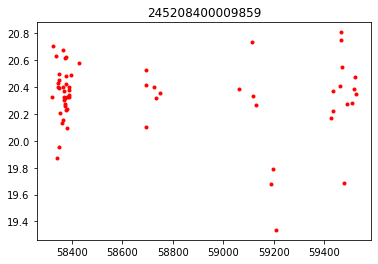

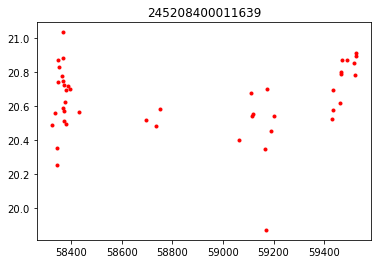

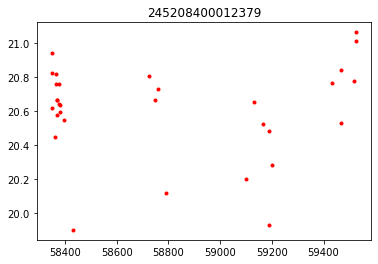

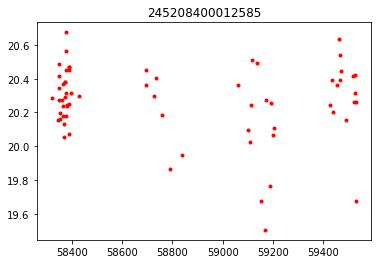

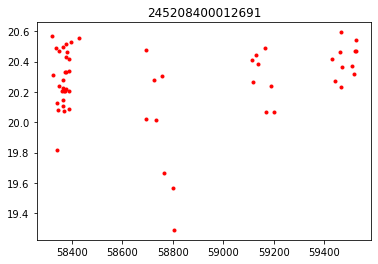

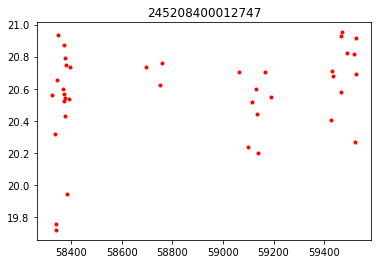

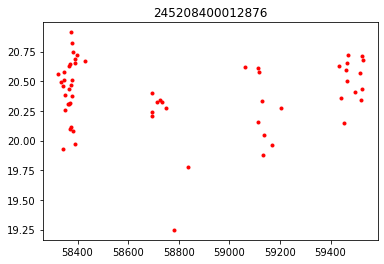

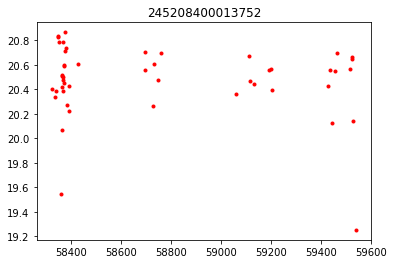

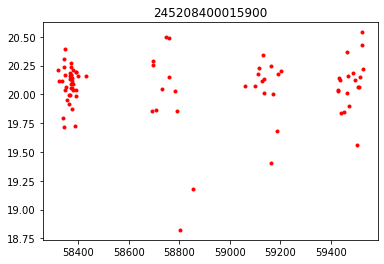

In [2]:
import pyarrow.parquet as pq
from pandas import DataFrame
import numpy as np
import os #functions for interacting with operating system
from matplotlib import pyplot as plt
from scipy.stats import skew

# VALUES
max_skew = -0.9  
max_neumann = 1.5 # circa

# LISTS
a_filtered_vorfilter = [] 
a_filtered_grobfilter = []

dir = "C:\Kanti\Microlensing\Python\data" 
for root, dirs, files in os.walk(dir):
    for i in files:
#LC-Paket-Tabelle 
        df = pq.read_table(os.path.join(root, i)).to_pandas()
        allLC_list = df.values.tolist()  #convert pandas dataframe to list
        for lc in allLC_list: # ".iterrows() gibt alle als Zeilen wie
            #AB HIER FILTER EINFÜGEN

            catfl = lc[11] #type(catfl) = numpy.ndarray
            nepochs = lc[6] #Anzahl Messpunkte
            filter = lc[1] #r, g or i -> only r
            if sum(catfl) == 0 and nepochs > 30 and filter == 2: 
                a_filtered_vorfilter.append(lc)

#Grobfilter: zu hohe Skewness & zu hoher Neumann-Statistik-Wert raus
for lc in a_filtered_vorfilter:  
    mag = lc[8]
    t = lc[7]
    neumann_lst = np.zeros(len(mag))
    std = np.std(mag)
    for i in range(1, len(mag)):
        neumann_lst[i] = ((mag[i] - mag[i-1])**2)/((len(mag)-1)*(std**2))
    n = np.sum(neumann_lst)
    if (skew(mag) < max_skew) and (n < max_neumann):
        a_filtered_grobfilter.append(lc)
        plt.figure()
        plt.title(lc[0])
        plt.plot(t, mag, ".", color = "red")
        
print("LC-Menge nachher: ", len(a_filtered_grobfilter))
